<a href="https://colab.research.google.com/github/David-Kumawat/Capstone-Project---4-Zomato-Restaurant-Clustering-And-Sentiment-Analysis/blob/main/Unsupervised_Zomato_Restaurant_Clustering_And_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Zomato Restaurant Clustering And Sentiment Analysis



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **GitHub Link -**

https://github.com/David-Kumawat/Capstone-Project---4-Zomato-Restaurant-Clustering-And-Sentiment-Analysis

# **Problem Statement**


Problem statement of unsupervised.png


Features of Restaurant Data(Unsupervised).png

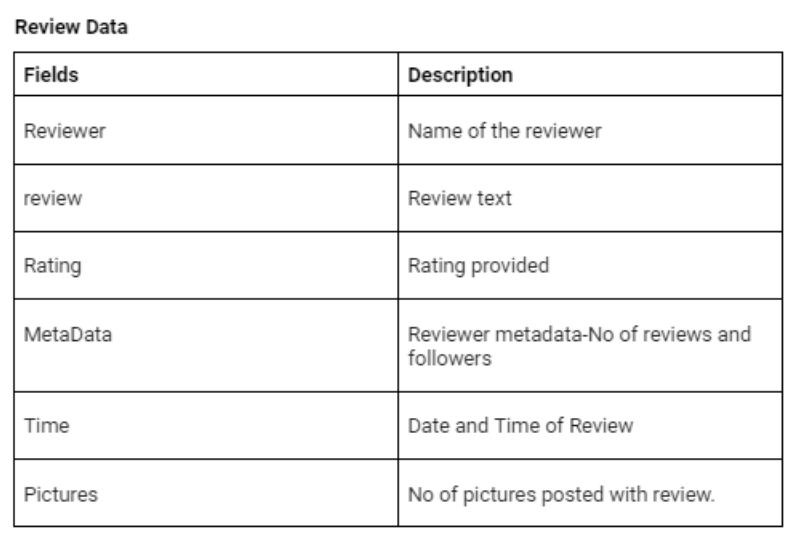

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing warnings to prevent warnings
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [2]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [286]:
# Load Dataset
rest_df = pd.read_csv('/content/drive/MyDrive/Capstone Project(Unsupervised)/Zomato Restaurant names and Metadata.csv')
reviews_df = pd.read_csv('/content/drive/MyDrive/Capstone Project(Unsupervised)/Zomato Restaurant reviews.csv')

### Dataset First View

In [287]:
# Restaurant Dataset First Look
rest_df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [34]:
# Reviews dataset First Look
reviews_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

### Dataset Rows & Columns count

In [35]:
# Restaurant Dataset Rows & Columns count
print(f"Rows and Column count in the Restaurant Dataset: Rows= {rest_df.shape[0]}, Columns= {rest_df.shape[1]}")

Rows and Column count in the Restaurant Dataset: Rows= 105, Columns= 6


In [36]:
# Reviews Dataset Rows & Columns count
print(f"Rows and Column count in the Reviews Dataset: Rows= {reviews_df.shape[0]}, Columns= {reviews_df.shape[1]}")

Rows and Column count in the Reviews Dataset: Rows= 10000, Columns= 7


### Dataset Information

In [37]:
# Restaurant Dataset Info
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [38]:
# Reviews Dataset Info
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [39]:
# Restaurant Dataset Duplicate Value Count
rest_df.duplicated().sum()

0

In [40]:
# Reviews Dataset Duplicate Value Count
reviews_df.duplicated().sum()

36

In [41]:
# Duplicate Values
duplicates = reviews_df[reviews_df.duplicated()]
duplicates

Restaurant Reviewer Review Rating Metadata Time  Pictures
8778  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8779  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8780  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8781  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8782  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8783  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8784  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8785  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8786  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8787  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8788  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8789  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8790  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8791  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8792  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8793  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8794  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8795  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8796  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8797  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8798  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8799  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
9086         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9087         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9088         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9089         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9090         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9091         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9092         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9093         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9094         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9095         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9096         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9097         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9098         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9099         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0

In the data set, we have duplicate null values.

#### Missing Values/Null Values

In [42]:
# # Rest_df Missing Values/Null Values Count
# Missing Values/Null Values Count
print("-"*50)
print("Null value count in each of the variable: ")
print("-"*50)
print(rest_df.isna().sum())
print("-"*50)

# Percentage of null values in each category
print("Percentage of null values in each variable: ")
print("-"*50)
null_count_by_variable = rest_df.isnull().sum()/len(rest_df)
print(f"{null_count_by_variable*100}%")
print("-"*50)


--------------------------------------------------
Null value count in each of the variable: 
--------------------------------------------------
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64
--------------------------------------------------
Percentage of null values in each variable: 
--------------------------------------------------
Name            0.000000
Links           0.000000
Cost            0.000000
Collections    51.428571
Cuisines        0.000000
Timings         0.952381
dtype: float64%
--------------------------------------------------


In [43]:
# Reviews_df Missing Values/Null Values Count
# Missing Values/Null Values Count
print("-"*50)
print("Null value count in each of the variable: ")
print("-"*50)
print(reviews_df.isna().sum())
print("-"*50)

# Percentage of null values in each category
print("Percentage of null values in each variable: ")
print("-"*50)
null_count_by_variable = reviews_df.isnull().sum()/len(reviews_df)
print(f"{null_count_by_variable*100}%")
print("-"*50)


--------------------------------------------------
Null value count in each of the variable: 
--------------------------------------------------
Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64
--------------------------------------------------
Percentage of null values in each variable: 
--------------------------------------------------
Restaurant    0.00
Reviewer      0.38
Review        0.45
Rating        0.38
Metadata      0.38
Time          0.38
Pictures      0.00
dtype: float64%
--------------------------------------------------


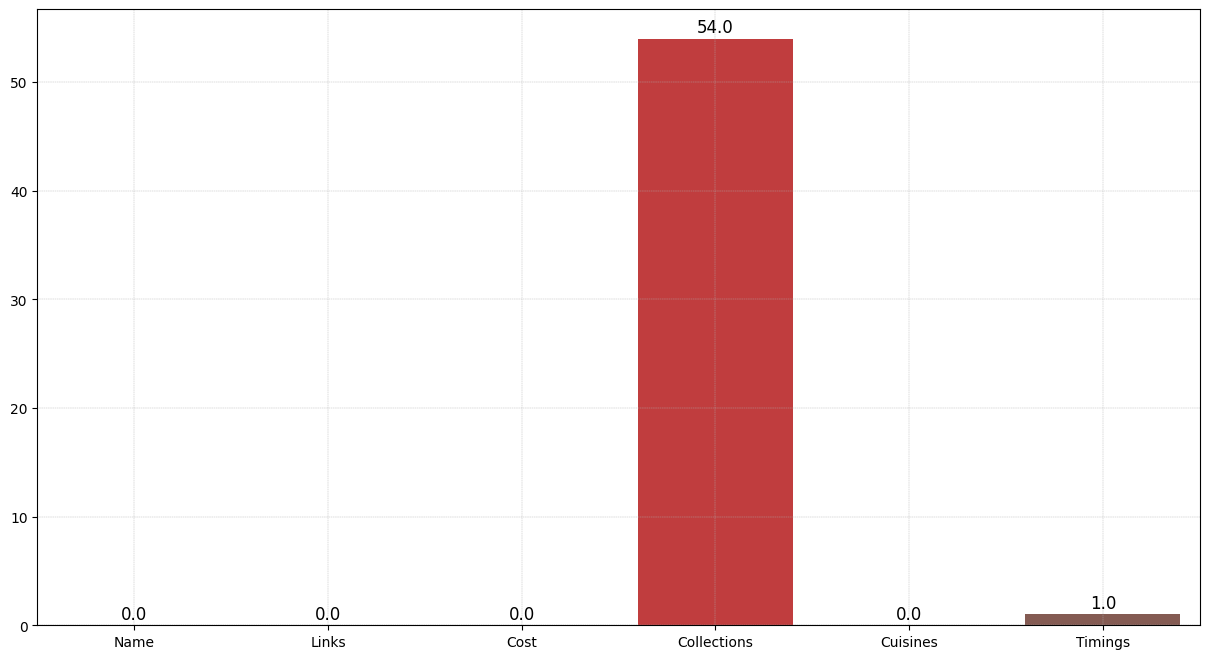

In [44]:
# Restaurant Data Visualizing the missing values
plt.figure(figsize=(15,8))
plots= sns.barplot(x=rest_df.columns,y=rest_df.isna().sum())
plt.grid(linestyle='--', linewidth=0.3)

for bar in plots.patches:
      plots.annotate(bar.get_height(),
                     (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                     size=12, xytext=(0, 8),
                     textcoords='offset points')
plt.show()

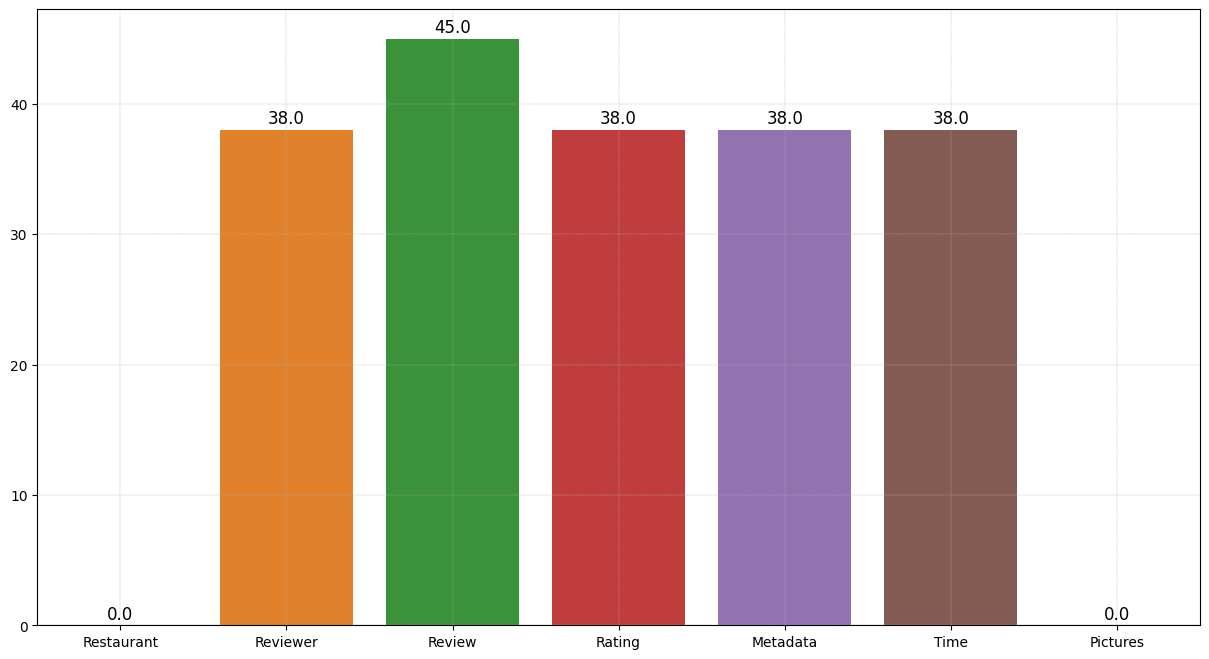

In [45]:
# Reviews Data Visualizing the missing values
plt.figure(figsize=(15,8))
plots= sns.barplot(x=reviews_df.columns,y=reviews_df.isna().sum())
plt.grid(linestyle='--', linewidth=0.3)

for bar in plots.patches:
      plots.annotate(bar.get_height(),
                     (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                     size=12, xytext=(0, 8),
                     textcoords='offset points')
plt.show()

<Axes: >

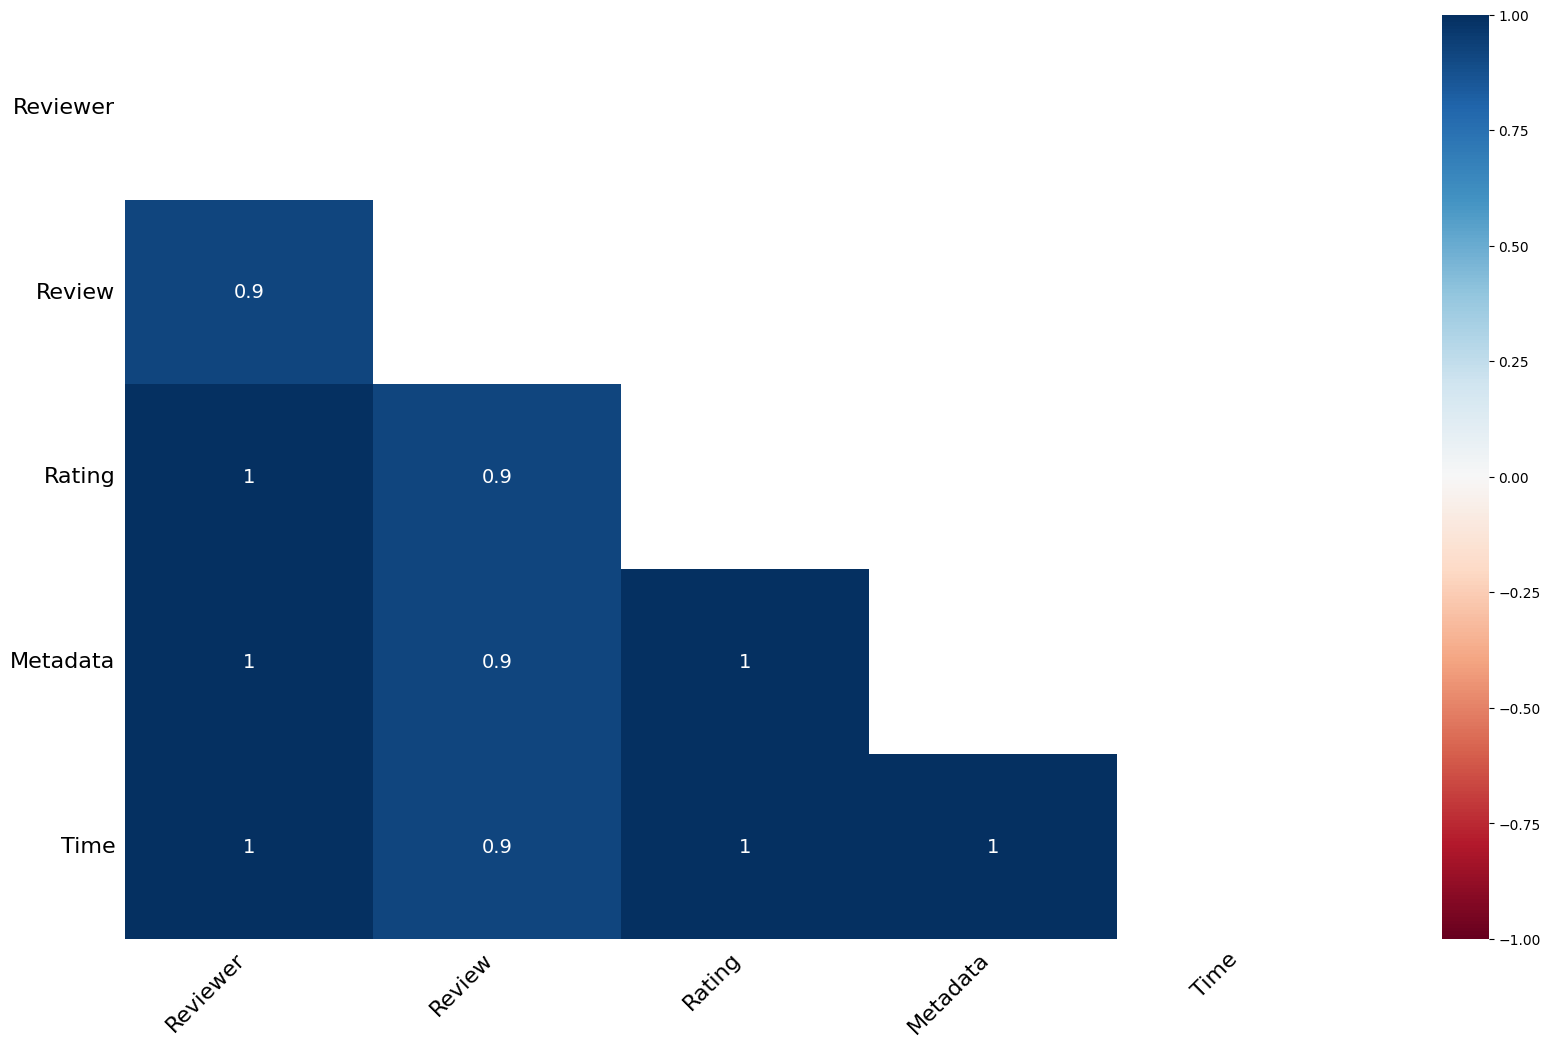

In [46]:
# Checking the heatmap
import missingno as msno
msno.heatmap(reviews_df)

### What did you know about your dataset?

* I have the two datasets 1. restaurant data and 2. reviews data

* The restaurant dataset has 105 restaurants, and with each row corresponding to each restaurant, there are 6 columns in the restaurant data set, and two columns have null values.

* The reviews dataset has 10000 rows and 7 columns, The columns Reviewer, Review, Rating, Metadata, and Time have some null values, There are 36 duplicate null values in data, and the reviewer column has 38 values that are null and 38 values in other columns. where the reviewer is missing where review, rating etc. also missing.

## ***2. Understanding Your Variables***

In [47]:
# Restaurant Dataset Columns
Columns_restaurant_df = rest_df.columns

# Print the column names
print("Column Names:")
for column in Columns_restaurant_df:
    print(column)

Column Names:
Name
Links
Cost
Collections
Cuisines
Timings


In [48]:
# Reviews Dataset Columns
Columns_reviews_df = reviews_df.columns

# Print the column names
print("Column Names:")
for column in Columns_reviews_df:
    print(column)

Column Names:
Restaurant
Reviewer
Review
Rating
Metadata
Time
Pictures


In [49]:
# Restaurant Dataset Describe
rest_df.describe(include = 'all')

Name                                              Links  \
count               105                                                105   
unique              105                                                105   
top     Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
freq                  1                                                  1   

       Cost                                  Collections  \
count   105                                           51   
unique   29                                           42   
top     500  Food Hygiene Rated Restaurants in Hyderabad   
freq     13                                            4   

                     Cuisines         Timings  
count                     105             104  
unique                     92              77  
top     North Indian, Chinese  11 AM to 11 PM  
freq                        4               6

In [50]:
# Reviews Dataset Describe
reviews_df.describe(include = 'all')

Restaurant     Reviewer Review Rating  Metadata             Time  \
count             10000         9962   9955   9962      9962             9962   
unique              100         7446   9364     10      2477             9782   
top     Beyond Flavours  Parijat Ray   good      5  1 Review  7/29/2018 20:34   
freq                100           13    237   3832       919                3   
mean                NaN          NaN    NaN    NaN       NaN              NaN   
std                 NaN          NaN    NaN    NaN       NaN              NaN   
min                 NaN          NaN    NaN    NaN       NaN              NaN   
25%                 NaN          NaN    NaN    NaN       NaN              NaN   
50%                 NaN          NaN    NaN    NaN       NaN              NaN   
75%                 NaN          NaN    NaN    NaN       NaN              NaN   
max                 NaN          NaN    NaN    NaN       NaN              NaN   

            Pictures  
count   10000.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.748600  
std         2.570381  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        64.000000

### Variables Description

The variable description of the Zomato Restaurant Clustering And Sentiment Analysis Dataset is as follows:

###**Restaurant Dataset**

1.   Name: Name of the Restaurants.    
2.   Links: URL Links of the Restaurants in Zomato.      
3.   Cost: Per Person Estimated Cost of the Dining.   
4.   Collections: Labels that provide additional information about the restaurant.
5.   Cuisines: Different types of food like Indian, Chinese, and American.
6.   Timings: Time of the Restaurant Open and Closed.

###**Reviews Dataset**

1. Restaurant: Name of the Restaurants.
2. Reviewer: Name of the Customer who reviewed.
3. Review: Review Written by the Customers.
4. Rating: Rating Given by the Customers (1 to 5).
5. Metadata: Customer(reviewer) number of the Reviews given previously and how many Followers Customer(reviewer) has.
6. Time: Date and Time of the Review.
7. Pictures: Numbers of pictures posted with the review.

### Check Unique Values for each variable.

In [51]:
# Check Unique Values for each variable of dataset Restaurant.
print("Unique Value Counts for Each Variable:")
print("-"*35)
rest_df.nunique()


Unique Value Counts for Each Variable:
-----------------------------------


Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

In [52]:
# Check Unique Values for each variable of dataset Reviews.
print("Unique Value Counts for Each Variable:")
print("-"*35)
reviews_df.nunique()


Unique Value Counts for Each Variable:
-----------------------------------


Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [288]:
# Write your code to make your dataset analysis ready.
# # Rest_df Missing Values/Null Values Count
# Missing Values/Null Values Count
print("-"*50)
print("Null value count in each of the variable: ")
print("-"*50)
print(rest_df.isna().sum())
print("-"*50)

# Percentage of null values in each category
print("Percentage of null values in each variable: ")
print("-"*50)
null_count_by_variable = rest_df.isnull().sum()/len(rest_df)
print(f"{null_count_by_variable*100}%")
print("-"*50)


--------------------------------------------------
Null value count in each of the variable: 
--------------------------------------------------
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64
--------------------------------------------------
Percentage of null values in each variable: 
--------------------------------------------------
Name            0.000000
Links           0.000000
Cost            0.000000
Collections    51.428571
Cuisines        0.000000
Timings         0.952381
dtype: float64%
--------------------------------------------------


In [289]:
# Impute one missing row in timing column with the mode
rest_df['Timings'].fillna(rest_df['Timings'].mode()[0],inplace=True)

In [290]:
# # Rest_df Missing Values/Null Values Count
# Missing Values/Null Values Count
print("-"*50)
print("Null value count in each of the variable: ")
print("-"*50)
print(rest_df.isna().sum())
print("-"*50)



--------------------------------------------------
Null value count in each of the variable: 
--------------------------------------------------
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         0
dtype: int64
--------------------------------------------------


In [291]:
# Checking cost column value count
rest_df['Cost'].value_counts()

500      13
600      10
700       8
1,200     7
400       6
1,000     6
200       5
800       5
1,500     5
1,300     4
350       3
1,600     3
750       3
550       3
900       3
1,100     3
1,700     2
150       2
1,400     2
450       2
1,900     2
300       1
2,500     1
850       1
650       1
1,800     1
2,800     1
1,750     1
250       1
Name: Cost, dtype: int64

In [292]:
# Changing cost datatype to int
rest_df['Cost'] = rest_df['Cost'].str.replace(',','')
rest_df['Cost'] = rest_df['Cost'].astype('int')

In [293]:
# Droping the Links Column
rest_df.drop('Links', axis = 1, inplace = True)

Dropping the Links column because its use won't be in clustering.

In [294]:
# Top 5 costlier restaurant
rest_df.sort_values('Cost', ascending = False)[['Name','Cost']][:5]

Name  Cost
92               Collage - Hyatt Hyderabad Gachibowli  2800
56                   Feast - Sheraton Hyderabad Hotel  2500
21  Jonathan's Kitchen - Holiday Inn Express & Suites  1900
18                                  10 Downing Street  1900
91            Cascade - Radisson Hyderabad Hitec City  1800

In [295]:
# Top 5 economy restaurant
rest_df.sort_values('Cost', ascending = False)[['Name','Cost']][-5:]

Name  Cost
85         Momos Delight   200
29    Hunger Maggi Point   200
101         Sweet Basket   200
89   Mohammedia Shawarma   150
23                  Amul   150

In [296]:
# Restaurant that share same price
rest_dict = {}
amount = rest_df.Cost.values.tolist()

#adding restaurant name based on the price by converting it into list
for price in amount:
    # Get all the rows that have the current price
    rows = rest_df[rest_df['Cost'] == price]
    rest_dict[price] = rows["Name"].tolist()

#converting it into dataframe
same_price_rest_df=pd.DataFrame.from_dict([rest_dict]).transpose().reset_index().rename(
    columns={'index':'Cost',0:'Name of Restaurants'})


#getting hotel count
rest_count = rest_df.groupby('Cost')['Name'].count().reset_index().sort_values(
    'Cost', ascending = False)

#merging together
same_price_rest_df = same_price_rest_df.merge(rest_count, how = 'inner',
                        on = 'Cost').rename(columns = {'Name':'Total_Restaurant'})

#max restaurants that share same price
same_price_rest_df.sort_values('Total_Restaurant', ascending = False)[:5]


Cost                                Name of Restaurants  Total_Restaurant
4    500  [eat.fit, KFC, Kritunga Restaurant, Karachi Ba...                13
17   600  [Behrouz Biryani, Karachi Cafe, Hyderabad Chef...                10
20   700  [Marsala Food Company, Green Bawarchi Restaura...                 8
2   1200  [Over The Moon Brew Company, The Glass Onion, ...                 7
8    400  [Sardarji's Chaats & More, Hotel Zara Hi-Fi, P...                 6

In [297]:
# Different Cuisiness Served by the Restaurants
pd.options.display.max_rows = 100
rest_df['Cuisines'].value_counts()

North Indian, Chinese                                                4
North Indian                                                         3
Ice Cream, Desserts                                                  2
Biryani, North Indian, Chinese                                       2
South Indian, North Indian, Chinese                                  2
Fast Food                                                            2
Continental                                                          2
North Indian, Chinese, Biryani                                       2
North Indian, Chinese, Continental                                   2
North Indian, Biryani, Chinese                                       2
Continental, Italian, North Indian, Chinese, Asian                   1
North Indian, Italian, Continental, Asian                            1
Cafe, Fast Food, Beverages                                           1
Bakery, Desserts                                                     1
North 

In [298]:
# Spliting the cusines and storing in list
cuisine_value_list = rest_df.Cuisines.str.split(', ')

In [299]:
# Storing all the cusines in a dictionary
cuisine_dict = {}
for cuisine_names in cuisine_value_list:
    for cuisine in cuisine_names:
        if cuisine in cuisine_dict:
           cuisine_dict[cuisine]+=1
        else:
            cuisine_dict[cuisine]=1

In [300]:
# Converting the dict to a data frame
cuisine_df = pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(
    columns={'index':'Cuisine',0:'Number of Restaurants'})


In [301]:
# Top 5 cuisine served by the restaurants
cuisine_df.sort_values('Number of Restaurants', ascending =False)[:5]

Cuisine  Number of Restaurants
5   North Indian                     61
0        Chinese                     43
1    Continental                     21
6        Biryani                     16
18     Fast Food                     15

In [302]:
# Spliting the cusines and storing in list
Collections_value_list = rest_df.Collections.dropna().str.split(', ')

In [303]:
# Storing all the cusines in a dictionary
Collections_dict = {}
for collection in Collections_value_list:
    for col_name in collection:
        if (col_name in Collections_dict):
            Collections_dict[col_name]+=1
        else:
            Collections_dict[col_name]=1


In [304]:
# Converting the dict to a data frame
Collections_df=pd.DataFrame.from_dict([Collections_dict]).transpose().reset_index().rename(
    columns={'index':'Tags',0:'Number of Restaurants'})

In [305]:
# Top 5 collection(tags) used by the Restaurant
Collections_df.sort_values('Number of Restaurants', ascending =False)[:5]

Tags  Number of Restaurants
2                                Great Buffets                     11
0  Food Hygiene Rated Restaurants in Hyderabad                      8
5                       Live Sports Screenings                      7
6                          Hyderabad's Hottest                      7
1                          Corporate Favorites                      6

In [306]:
# Dropping Collections column
rest_df.drop("Collections", axis = True, inplace=True)

###**Reviews Data**

In [307]:
# Reviews info - null count and dtypes
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [308]:
# Checking null rows in reviews column
reviews_df[reviews_df['Review'].isnull()]

Restaurant                Reviewer Review Rating  \
2360                 Amul        Lakshmi Narayana    NaN      5   
5799         Being Hungry                   Surya    NaN      5   
6449      Hyderabad Chefs          Madhurimanne97    NaN      5   
6489      Hyderabad Chefs                  Harsha    NaN      5   
7954         Olive Garden  ARUGULLA PRAVEEN KUMAR    NaN      3   
8228   Al Saba Restaurant                  Suresh    NaN      5   
8777  American Wild Wings                     NaN    NaN    NaN   
8778  American Wild Wings                     NaN    NaN    NaN   
8779  American Wild Wings                     NaN    NaN    NaN   
8780  American Wild Wings                     NaN    NaN    NaN   
8781  American Wild Wings                     NaN    NaN    NaN   
8782  American Wild Wings                     NaN    NaN    NaN   
8783  American Wild Wings                     NaN    NaN    NaN   
8784  American Wild Wings                     NaN    NaN    NaN   
8785  American Wild Wings                     NaN    NaN    NaN   
8786  American Wild Wings                     NaN    NaN    NaN   
8787  American Wild Wings                     NaN    NaN    NaN   
8788  American Wild Wings                     NaN    NaN    NaN   
8789  American Wild Wings                     NaN    NaN    NaN   
8790  American Wild Wings                     NaN    NaN    NaN   
8791  American Wild Wings                     NaN    NaN    NaN   
8792  American Wild Wings                     NaN    NaN    NaN   
8793  American Wild Wings                     NaN    NaN    NaN   
8794  American Wild Wings                     NaN    NaN    NaN   
8795  American Wild Wings                     NaN    NaN    NaN   
8796  American Wild Wings                     NaN    NaN    NaN   
8797  American Wild Wings                     NaN    NaN    NaN   
8798  American Wild Wings                     NaN    NaN    NaN   
8799  American Wild Wings                     NaN    NaN    NaN   
8844       Domino's Pizza             Sayan Gupta    NaN      5   
9085         Arena Eleven                     NaN    NaN    NaN   
9086         Arena Eleven                     NaN    NaN    NaN   
9087         Arena Eleven                     NaN    NaN    NaN   
9088         Arena Eleven                     NaN    NaN    NaN   
9089         Arena Eleven                     NaN    NaN    NaN   
9090         Arena Eleven                     NaN    NaN    NaN   
9091         Arena Eleven                     NaN    NaN    NaN   
9092         Arena Eleven                     NaN    NaN    NaN   
9093         Arena Eleven                     NaN    NaN    NaN   
9094         Arena Eleven                     NaN    NaN    NaN   
9095         Arena Eleven                     NaN    NaN    NaN   
9096         Arena Eleven                     NaN    NaN    NaN   
9097         Arena Eleven                     NaN    NaN    NaN   
9098         Arena Eleven                     NaN    NaN    NaN   
9099         Arena Eleven                     NaN    NaN    NaN   

                     Metadata             Time  Pictures  
2360                0 Reviews  7/29/2018 18:00         0  
5799  4 Reviews , 4 Followers  7/19/2018 23:55         0  
6449                 1 Review  7/23/2018 16:29         0  
6489                 1 Review   7/8/2018 21:19         0  
7954    1 Review , 1 Follower   8/9/2018 23:25         0  
8228                 1 Review  7/20/2018 22:42         0  
8777                      NaN              NaN         0  
8778                      NaN              NaN         0  
8779                      NaN              NaN         0  
8780                      NaN              NaN         0  
8781                      NaN              NaN         0  
8782                      NaN              NaN         0  
8783                      NaN              NaN         0  
8784                      NaN              NaN         0  
8785                      NaN              NaN 

The "Review" column has text that needs to be analyzed to understand the sentiments and without it, the analysis cannot be done. It can also be seen that most of the null values in the review column also have nulls in other corresponding columns such as Reviewer, Rating, Metadata, and Time. These instances should be dropped.

In [309]:
# Dropping null rows in review column
reviews_df.dropna(subset = ["Review"], inplace=True)

In [310]:
# Checking Null Values
reviews_df.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [311]:
# Checking the duplicate values in dataset
reviews_df.duplicated().sum()

0

Now, we don't have duplicate values with us because we have drop all duplicate null values.

In [312]:
# Checking Rating Column
reviews_df['Rating'].unique()


array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'],
      dtype=object)

In [313]:
# Changing Like with 4.
# Correcting and changing the datatype
reviews_df['Rating'] = reviews_df['Rating'].replace('Like','4')
reviews_df['Rating'] = reviews_df['Rating'].astype('float')

In [314]:
# Changing date and extracting few feature for manipulation

reviews_df[['Reviewer_Total_Review', 'Reviewer_Followers']] = reviews_df['Metadata'].str.split(',', expand=True)
reviews_df['Reviewer_Total_Review'] = pd.to_numeric(reviews_df['Reviewer_Total_Review'].str.split(' ').str[0])
reviews_df['Reviewer_Followers'] = pd.to_numeric(reviews_df['Reviewer_Followers'].str.split(' ').str[1])
reviews_df['Time']=pd.to_datetime(reviews_df['Time'])
reviews_df['Review_Year'] = pd.DatetimeIndex(reviews_df['Time']).year
reviews_df['Review_Month'] = pd.DatetimeIndex(reviews_df['Time']).month
reviews_df['Review_Hour'] = pd.DatetimeIndex(reviews_df['Time']).hour

In [315]:
#Average engagement of restaurants
avg_hotel_rating = reviews_df.groupby('Restaurant').agg({'Rating':'mean',
        'Reviewer': 'count'}).reset_index().rename(columns = {'Reviewer': 'Total_Review'})
avg_hotel_rating.head()

Restaurant  Rating  Total_Review
0               10 Downing Street    3.80           100
1                        13 Dhaba    3.48           100
2  3B's - Buddies, Bar & Barbecue    4.76           100
3       AB's - Absolute Barbecues    4.88           100
4               Absolute Sizzlers    3.62           100

In [316]:
# Checking Restaurant count as total Restaurant in Restaurant data was 105
reviews_df.Restaurant.nunique()

100

In [317]:
# Finding Restaurants without review
Restaurant_without_review = [name for name in rest_df.Name.unique().tolist()
       if name not in reviews_df.Restaurant.unique().tolist()]
Restaurant_without_review

['IndiBlaze',
 'Sweet Basket',
 'Angaara Counts 3',
 'Wich Please',
 'Republic Of Noodles - Lemon Tree Hotel']

In [318]:
# Top 5 most engaging or rated restaurant
avg_hotel_rating.sort_values('Rating', ascending = False)[:5]

Restaurant  Rating  Total_Review
3        AB's - Absolute Barbecues    4.88           100
11                          B-Dubs    4.81           100
2   3B's - Buddies, Bar & Barbecue    4.76           100
67                        Paradise    4.70           100
35                        Flechazo    4.66           100

In [319]:
# Top 5 lowest rated restaurant
avg_hotel_rating.sort_values('Rating', ascending = True)[:5]

Restaurant  Rating  Total_Review
41  Hotel Zara Hi-Fi   2.400           100
10    Asian Meal Box   2.580           100
66     Pakwaan Grand   2.710           100
57     Mathura Vilas   2.820           100
14   Behrouz Biryani   2.825           100

In [320]:
# Finding the most followed reviewer
most_followed_reviewer = reviews_df.groupby('Reviewer').agg({'Reviewer_Total_Review':'max',
      'Reviewer_Followers':'max', 'Rating':'mean'}).reset_index().rename(columns = {
          'Rating':'Average_Rating_Given'}).sort_values('Reviewer_Followers', ascending = False)
most_followed_reviewer[:5]


Reviewer  Reviewer_Total_Review  Reviewer_Followers  \
5460    Satwinder Singh                    186             13410.0   
1700         Eat_vth_me                     60             13320.0   
5232       Samar Sardar                      8             11329.0   
1786  Foodies Hyderabad                     31              9494.0   
6225           Srinivas                     34              7628.0   

      Average_Rating_Given  
5460              3.666667  
1700              5.000000  
5232              3.500000  
1786              4.500000  
6225              3.714286

In [321]:
# Finding which year show maximum engagement
hotel_year = reviews_df.groupby('Review_Year')['Restaurant'].apply(lambda x: x.tolist()).reset_index()
hotel_year['Count'] = hotel_year['Restaurant'].apply(lambda x: len(x))
hotel_year

Review_Year                                         Restaurant  Count
0         2016  [Labonel, Labonel, Labonel, Labonel, Labonel, ...     43
1         2017  [KS Bakers, KS Bakers, KS Bakers, KS Bakers, K...    213
2         2018  [Shah Ghouse Spl Shawarma, Shah Ghouse Spl Sha...   4896
3         2019  [Beyond Flavours, Beyond Flavours, Beyond Flav...   4803

In [322]:
# Creting Copy of the Datasets
hotel = rest_df.copy()
review = reviews_df.copy()

In [323]:
# Merging both data frame
hotel = hotel.rename(columns = {'Name':'Restaurant'})
merged_data = hotel.merge(review, on = 'Restaurant')
merged_data.shape


(9955, 15)

In [324]:
# Head of the merge data
merged_data.head()

Restaurant  Cost                                           Cuisines  \
0  Beyond Flavours   800  Chinese, Continental, Kebab, European, South I...   
1  Beyond Flavours   800  Chinese, Continental, Kebab, European, South I...   
2  Beyond Flavours   800  Chinese, Continental, Kebab, European, South I...   
3  Beyond Flavours   800  Chinese, Continental, Kebab, European, South I...   
4  Beyond Flavours   800  Chinese, Continental, Kebab, European, South I...   

                                         Timings              Reviewer  \
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)     Rusha Chakraborty   
1  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  Anusha Tirumalaneedi   
2  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)       Ashok Shekhawat   
3  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)        Swapnil Sarkar   
4  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                  Metadata                Time  Pictures  \
0   1 Review , 2 Followers 2019-05-25 15:54:00         0   
1  3 Reviews , 2 Followers 2019-05-25 14:20:00         0   
2  2 Reviews , 3 Followers 2019-05-24 22:54:00         0   
3    1 Review , 1 Follower 2019-05-24 22:11:00         0   
4  3 Reviews , 2 Followers 2019-05-24 21:37:00         0   

   Reviewer_Total_Review  Reviewer_Followers  Review_Year  Review_Month  \
0                      1                 2.0         2019             5   
1                      3                 2.0         2019             5   
2                      2                 3.0         2019             5   
3                      1                 1.0         2019             5   
4                      3                 2.0         2019             5   

   Review_Hour  
0           15  
1           14  
2           22  
3           22  
4           21

In [325]:
# Avg.Price of Restaurants those rating High
Avg_price = merged_data.groupby('Restaurant').agg({'Rating':'mean',
        'Cost': 'mean'}).reset_index().rename(columns = {'Cost': 'Avg.Price'})

In [326]:
# Avg.price for high rated Restaurants
Avg_price.sort_values('Rating',ascending = False)[:5]

Restaurant  Rating  Avg.Price
3        AB's - Absolute Barbecues    4.88     1500.0
11                          B-Dubs    4.81     1600.0
2   3B's - Buddies, Bar & Barbecue    4.76     1100.0
67                        Paradise    4.70      800.0
35                        Flechazo    4.66     1300.0

In [327]:
# Avg.price for lowest rated Restaurants
Avg_price.sort_values('Rating',ascending = True)[:5]

Restaurant  Rating  Avg.Price
41  Hotel Zara Hi-Fi   2.400      400.0
10    Asian Meal Box   2.580      200.0
66     Pakwaan Grand   2.710      400.0
57     Mathura Vilas   2.820      500.0
14   Behrouz Biryani   2.825      600.0

In [328]:
# Rating count by reviewer
rating_count_df = pd.DataFrame(reviews_df.groupby('Reviewer').size(), columns=[
                                                                "Rating_Count"])
rating_count_df.sort_values('Rating_Count', ascending = False)[:5]


Rating_Count
Reviewer                  
Ankita                  13
Parijat Ray             13
Kiran                   12
Vedant Killa            11
Jay Mehta               11

### What all manipulations have you done and insights you found?

Firstly, I started with checking null values and in the restaurant data frame the timing column only has one null value so I changed with mode, then I changed the data type of the cost column, and then I dropped the Links column because there is no use of URL Links.

* Restaurant data: In this dataset, I first figured out 5 costlier restaurants in which Collage - Hyatt Hyderabad Gachibowli has a maximum price of 2800 and then found the lowest which is Amul with a price of 150. Then I found how many hotels share the same price i.e., 13 hotels share a 500 price. North Indian cuisine with great buffet tags is mostly used in hotels.

* Review data: In this dataset, I Removed the null values from review the column and then In the rating column there was only one rating which was a string or had a value of like so I changed it into 4 of the ratings. This was done to make data consistent. In this dataset, I found famous restaurants that show maximum engagement. Following that I found the most followed critic which was Satwinder Singh who posted a total of 186 reviews and had followers of 13410 who gave an average of 3.67 ratings for each order he made. Lastly, I also found in the year 2018 4903 hotels got reviews.

- Then I merged the two datasets to figure out the Avg. price for the restaurant, The top-rated restaurant AB's - Absolute Barbecues has an Avg.price of 1500 and the low-rated Hotel Zara Hi-Fi has a price point of 400.

In order to exactly understand why even with Avg. price of 1500 these Restaurants have a maximum number of ratings and the sentiment of those ratings need to extract words from the text do further analysis of the review and then follow by forming clusters so that one can get recommendations about top quality restaurants.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Histplot for Distribution

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(18, 8))
for i, col in enumerate(['Cost', 'Rating', 'Review_Year']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(merged_data[col], kde=True, color='#055E85', stat='density')
    feature = merged_data[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3, label='mean')  # red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3, label='median')  # cyan
    plt.legend(loc='upper right')
    plt.title(f'{col.title()}')
    plt.tight_layout()

plt.show()

##### 1. Why did you pick the specific chart?

The Histplot helps understand the distribution of the feature.

##### 2. What is/are the insight(s) found from the chart?

- All three are skewed.
- Maximum restaurant show price range for 500.
- In 2018 the number of reviews is more.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In this chart, it is unable to figure any impact on business when plotted all alone.

#### Chart - 2 Maximum Engagement and Lowest Engagement

In [ ]:
# Geting the top 10 hotel that show maximum engagement
most_engaged_hotel = Avg_price.sort_values('Rating', ascending = False)

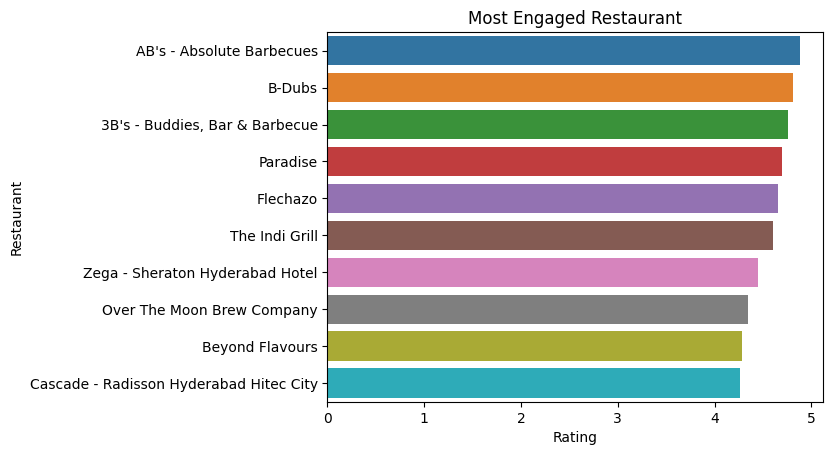

In [ ]:
# Chart - 2 visualization code for most liked
sns.barplot(data = most_engaged_hotel[:10], x = 'Rating', y = 'Restaurant')
plt.title('Most Engaged Restaurant')
plt.show()

In [ ]:
# Chart for less liked Restaurants
sns.barplot(data = most_engaged_hotel[-10:], x = 'Rating', y = 'Restaurant')
plt.title('Less Engaged Restaurant')
plt.show()


##### 1. Why did you pick the specific chart?

A Bar Chart makes it easy to observe and analyze the distribution or relationship between different categories.

##### 2. What is/are the insight(s) found from the chart?

AB's - Absolute Barbecues, show maximum engagement and retention as it has a maximum number of ratings on average and Hotel Zara Hi-Fi shows the lowest engagement as has the lowest average rating.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Engagement and retention for any business are very important as profit and scalability for any business depend upon the retention of customers. Maximum retention means people prefer to use the same brand over others.

* Some restaurants show lower ratings which can show negative growth if not monitored why do they receive fewer orders for example KFC is listed at a low rate it is sure they have different outlets and outsourcing and are listed here because of the popularity of the app and increased their sale and demand but are not giving 100% dedication to the platform to generate revenue.

#### Chart - 3 Price Points for High-Rated and Low-Rated Restaurants

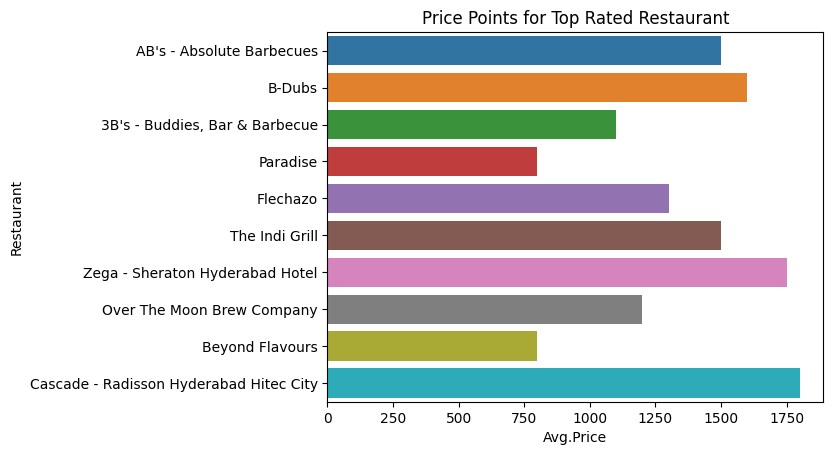

In [ ]:
# Chart - 3 Visualization code for price points of high-rated restaurant
sns.barplot(data = most_engaged_hotel[:10], x = 'Avg.Price', y = 'Restaurant')
plt.title('Price Points for Top Rated Restaurant')
plt.show()

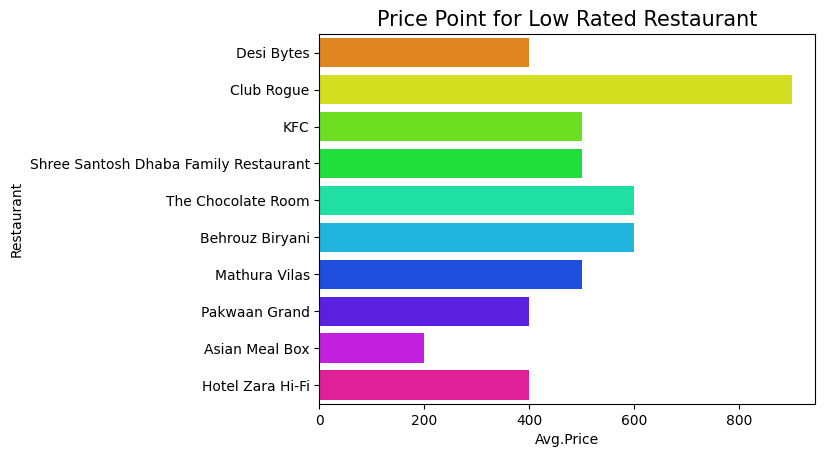

In [ ]:
# Visualization code for price points of low-rated restaurant
sns.barplot(data = most_engaged_hotel[-10:], x = 'Avg.Price',
            y = 'Restaurant',palette = 'hsv')
plt.title('Price Point for Low Rated Restaurant', size = 15)

plt.show()

##### 1. Why did you pick the specific chart?

Here I choose barplot because barplot is a good choice for plotting restaurant names and price points as it is a simple and effective way to display the comparison of different categories (Restaurant names) and their corresponding values (Avg. price) on the same chart. Also, it allows us to have a sense of the price range of each Restaurant and how they compare to each other.

##### 2. What is/are the insight(s) found from the chart?

Avg. Price for High-rated hotel AB's= Absolute Barbecues is 1500 and the Avg. price for a low-rated restaurant Hotel Zara Hi-Fi is 400.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Since it is a customer-centred business i.e., direct-to-consumer it is important to understand the price point which makes this business more affordable for everyone, therefore business needs to crack the price point.

Here most liked restaurant has a price point of 1500 which is even a little higher than average but as this business is all about food quality and taste it shows maximum engagement which means it serves the best quality of food, however deep dive into analysing review text can exactly give why this price point is prefered most.

Some restaurants with the lowest ratings even with low price points are not engaging, this may create a negative impact on business.

However it can not be finalized that this hotel should unlisted as there may be a chance of different cuisine they both serve and it also depends upon the locality they both serve, therefore based on that small promotional offers can also be given for low-rated restaurants to increase sales.

#### Chart - 4 Proportion of Cuisine Sold by Most Restaurants.

In [ ]:
# List of all cuisine
cuisine_list = cuisine_df.sort_values('Number of Restaurants', ascending = False)['Cuisine'].tolist()[:5]


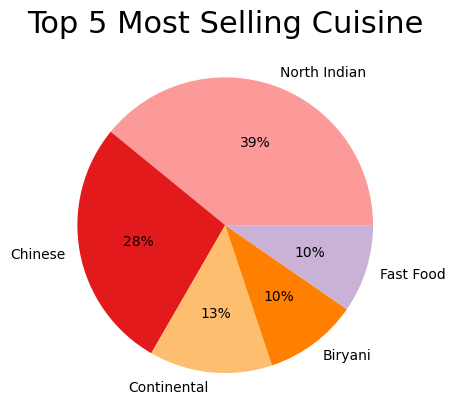

In [ ]:
# Chart - 4 visualization code pie chart for top 5 most selling cuisine
data = cuisine_df.sort_values('Number of Restaurants', ascending = False)[
    'Number of Restaurants'].tolist()[:5]
labels = cuisine_list

#define Seaborn color palette to use
colors = sns.color_palette('Paired')[4:9]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Top 5 Most Selling Cuisine', size =22, color= 'black')
plt.show()

In [444]:
# Installing wordcloud
!pip install wordcloud

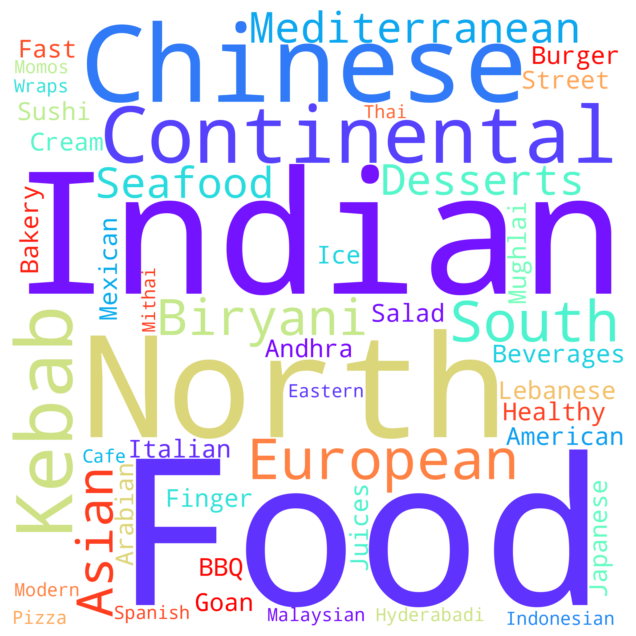

In [ ]:
# Importing necessary libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Concatenate all cuisine names into a single text string
plt.figure(figsize=(15, 8))
text = " ".join(name for name in cuisine_df['Cuisine'])

#  Create a WordCloud object
wordcloud = WordCloud(width=2000, height=2000, collocations=False,
                      colormap='rainbow', background_color='white').generate(text)

# Display the generated Word Cloud using Matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

Here I choose to use a pie chart because it shows the proportion of each quantity and use wordcloud because it shows all text and highlights the most frequent words.

##### 2. What is/are the insight(s) found from the chart?

Based on the above charts it is clear that most of the Restaurants sold North Indian food followed by Chinese.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Plotting a pie chart of cuisine types can help to identify the most popular cuisine types among its customers. This information can be used to make strategic decisions about which cuisines to focus on promoting and expanding. For example, as a significant portion of customers are searching for North Indian restaurants, Zomato could focus on adding more North Indian restaurants to its platform and promoting them to customers.

Similarly, a word cloud of cuisine can help Zomato identify the most frequently mentioned cuisine types in restaurants. This can provide insight into which cuisines are most popular and well-regarded among customers, and which cuisines may need improvement.

However, these types of charts do not provide all the information about the business, and can not be the only decision-making factor. For example, a pie chart showing that a certain cuisine is popular does not tell us about the profitability of that cuisine or the competition in that category. The same goes for word cloud, it only shows us the frequency of the cuisine mentioned, and it can not tell us if the mentions are positive or negative.

Additionally, these charts do not provide information about the other factors that can impact the business such as market trends, consumer preferences, and economic conditions. Therefore, Zomato needs to consider other data and information when making strategic decisions.

#### Chart - 5

In [ ]:
# List of all collection
collection_list = Collections_df.sort_values('Number of Restaurants',
                          ascending = False)['Tags'].tolist()[:5]

In [ ]:
# Top 5 collection(tags) used by the Restaurant
Collections_df.sort_values('Number of Restaurants', ascending =False)[:5]

Tags  Number of Restaurants
2                                Great Buffets                     11
0  Food Hygiene Rated Restaurants in Hyderabad                      8
5                       Live Sports Screenings                      7
6                          Hyderabad's Hottest                      7
1                          Corporate Favorites                      6

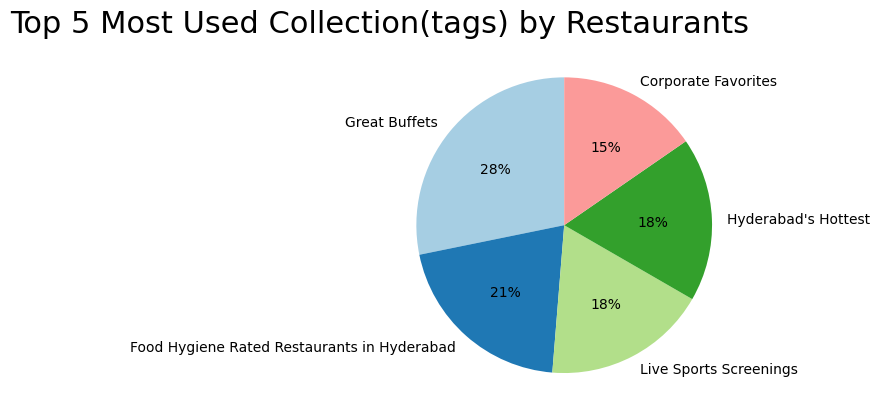

In [ ]:
# Chart - 5 visualization code pie chart for top 5 most
# Importing library
import matplotlib.pyplot as plt
import seaborn as sns


# Sort the DataFrame by 'Number of Restaurants' and select the top 5
data = Collections_df.sort_values('Number of Restaurants', ascending=False)[
                                'Number of Restaurants'].tolist()[:5]

# Specify labels for the top 5 collections
labels = collection_list

# Define Seaborn color palette to use
colors = sns.color_palette('Paired')[:5]

# Create a pie chart
title = 'Top 5 Most Used Collection(tags) by Restaurants'
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%', startangle=90)
plt.title(title, size=22, color='black', loc='right')

# Show the plot
plt.show()


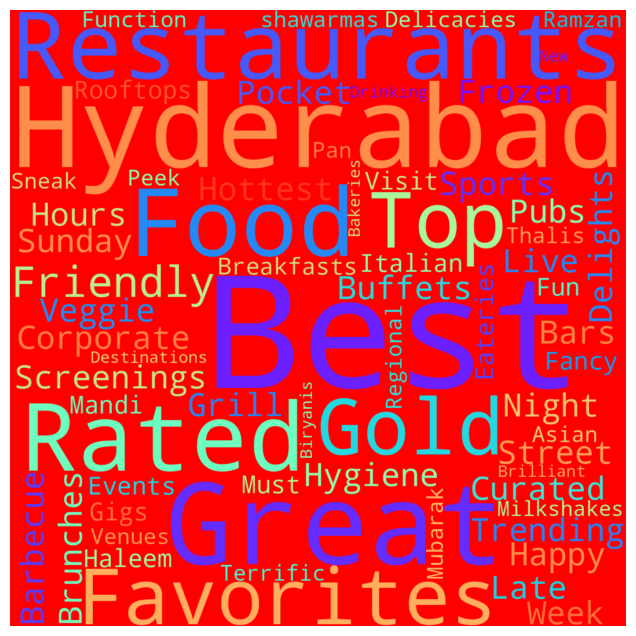

In [ ]:
# Importing WordCloud
from wordcloud import WordCloud

# Fixing the size
plt.figure(figsize=(15, 8))

# Concatenate all Tags into a single text string
text = " ".join(tag for tag in Collections_df['Tags'].astype(str))

# Create a WordCloud object with specified parameters
word_cloud = WordCloud(width=1400, height=1400, collocations=False,
                       colormap='rainbow', background_color='red').generate(text)

# Display the generated Word Cloud using Matplotlib
plt.imshow(word_cloud, interpolation='bilinear')

# Turn off the axis labels
plt.axis("off")

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

**Pie Chart:**
A pie chart is used to visually represent the distribution of parts within a whole, making it effective for displaying the proportional contribution of different categories to the total.

**Word Cloud:**
A word cloud visually emphasizes and displays the frequency of words in a text, providing a quick overview of the most prominent terms and helping identify key themes or patterns.

##### 2. What is/are the insight(s) found from the chart?

Great Buffets is the most frequently used tag and other tags great, best, north, and Hyderabad are also used in large quantities.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6 Learn about Reviewers

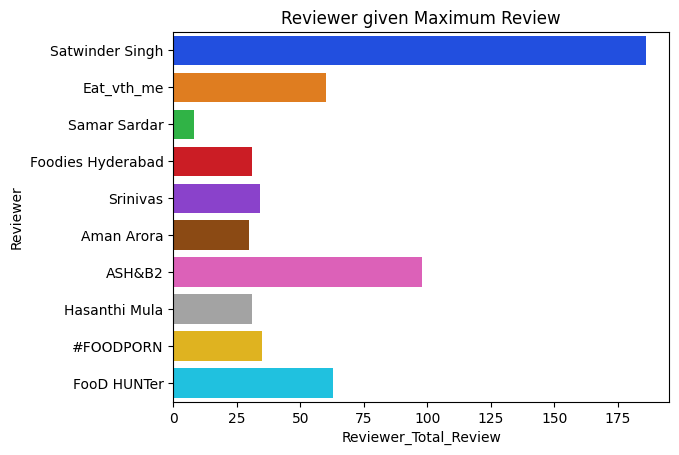

In [ ]:
# Chart - 6 visualization code for most reviews done by the reviewers
sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_Total_Review',
            y = 'Reviewer', palette='bright')
plt.title('Reviewer given Maximum Review')
plt.show()

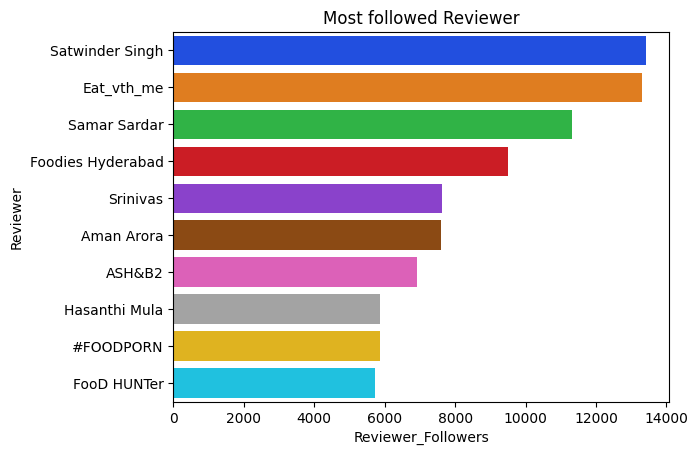

In [ ]:
# visualization code for most follower have reviewer
sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_Followers',
            y = 'Reviewer',palette='bright')
plt.title('Most followed Reviewer')
plt.show()

In [ ]:
# Visualization code for the average rating given by the most followed reviewer
sns.barplot(data = most_followed_reviewer[:10], x = 'Average_Rating_Given',
            y = 'Reviewer',palette='bright')
plt.title('Average Ratings gave by Most followed Reviewer')
plt.show()


##### 1. Why did you pick the specific chart?

A bar plot is utilized to display and compare the numerical values of different categories or groups, making it effective for visualizing variations and relationships within the data.

##### 2. What is/are the insight(s) found from the chart?

Satwinder Singh is the most popular reviewer who has a maximum number of followers and a maximum number of reviews given, and on average he gave a 3.5 rating.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This information can be used to make strategic decisions about which reviewers to focus on promoting and expanding. For example, if a certain reviewer has a high average rating and a large number of followers, Zomato could focus on promoting their reviews to customers.

It's important to note that this chart does not provide all the information about the business, and can not be the only decision-making factor. However, it can help with promotions of food based on reviews.

#### Chart - 7 Restaurants with Highest Price and Lowest Price

In [ ]:
# Extracting name and price
price_of_hotel = hotel.sort_values('Cost', ascending = False)[['Restaurant','Cost']]


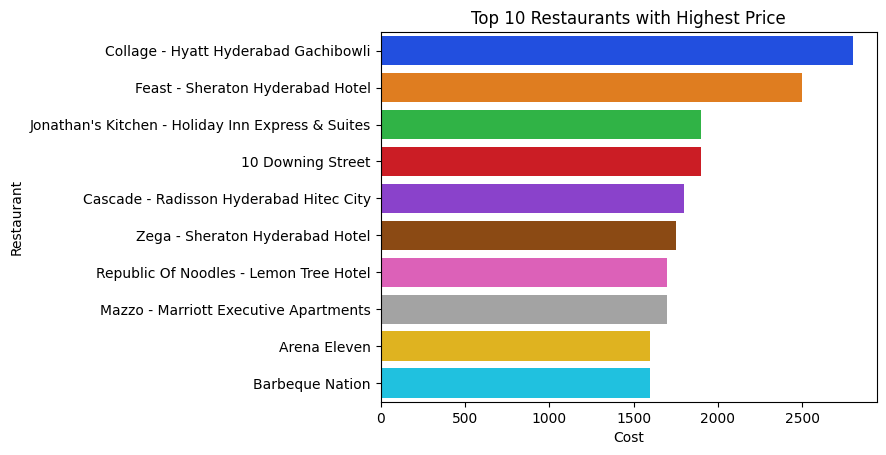

In [ ]:
# Chart - 7 Visualization code for restaurants with maximum price
sns.barplot(data = price_of_hotel[:10], x = "Cost", y='Restaurant', palette = 'bright')
plt.title('Top 10 Restaurants with Highest Price')
plt.show()


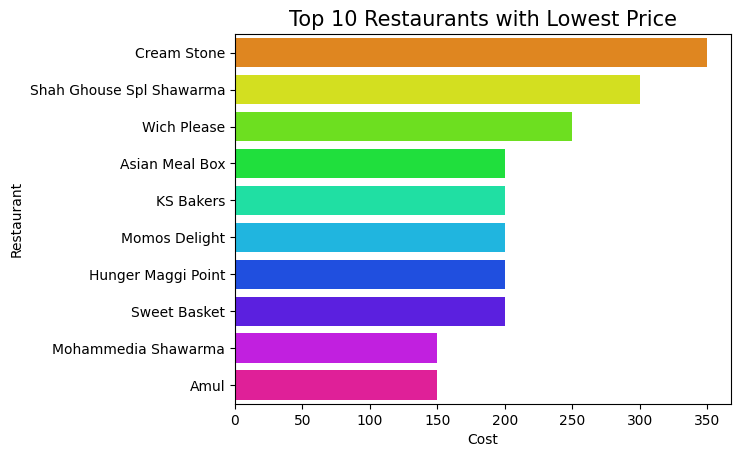

In [ ]:
# Restaurants with lowest price
sns.barplot(data = price_of_hotel[-10:], x = "Cost", y='Restaurant', palette = 'hsv')
plt.title('Top 10 Restaurants with Lowest Price', size =15, color = 'black')
plt.show()

##### 1. Why did you pick the specific chart?


**Barplot:**
They are Used to display and compare the distribution or values of different categories or groups.



##### 2. What is/are the insight(s) found from the chart?

Based on the above chart it is clear that restaurant Collage - Hyatt Hyderabad Gachibowli is the most expensive restaurant in the locality which has a price of 2800 per order and has 3.5 average rating.

Hotels like Amul and Mohammedia Shawarma are the least expensive with a price of 150 and have a 3.9, 3.5 average rating.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Most expensive products are always the centre of attraction for a niche market (a subset of the market on which a specific product is focused) at the same time for a business purpose, these products are preferred to be the most revenue-generating market.


#### Chart - 8 Restaurants Based on Price and Ratings

In [ ]:
# Merging average rating and cost to find rating for expensive restaurants
expected_revenue = avg_hotel_rating.merge(hotel[['Restaurant','Cost']], on = 'Restaurant')
# Calculating expected revenue based on total review recieved
expected_revenue['Expected_Revenue'] = expected_revenue['Total_Review'] * expected_revenue['Cost']

In [ ]:
# Chart - 8 visualization code for rating based on price and restaurants
plt.figure(figsize=(16,6))
data = expected_revenue.sort_values('Cost', ascending  = False)
sns.scatterplot(data= data, x= "Restaurant", y="Rating", size="Cost",
                hue = 'Cost',legend=True, sizes=(20, 2000),palette ="icefire")
plt.xticks(rotation=90)
plt.title('Restaurants based on Price and Ratings',size=20,color = 'black')
plt.show()


##### 1. Why did you pick the specific chart?

**Scatterplot:**
Shows the relationship and pattern between two continuous variables through individual data points on a graph.


##### 2. What is/are the insight(s) found from the chart?

For restaurants whose prices are greater than 1000 those restaurant's ratings are also high, and for those restaurants that have prices less than 1000, their ratings are 4 or less than 4.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Those restaurants who has prices are high their rating is good, because they provide good food and good service that's the way customers give them good ratings, and this is good for the business, ratings play a very good role in making a good business.

#### Chart - 9 Expected Revenue

In [ ]:
# Chart - 9 visualization code to understand expected revenue
fig = plt.figure(figsize=[20,6])
sns.barplot(data= data, x='Restaurant', y= 'Expected_Revenue', palette ="rainbow")
plt.title("Expected_Revenue from each Restaurant", size = 22)
plt.xlabel('Restaurant Name', size = 22)
plt.xticks(rotation=90)
plt.ylabel('Expected_Revenue', size = 22)
plt.show()

##### 1. Why did you pick the specific chart?

**Barplot:** They are Used to display and compare the distribution or values of different categories or groups.

##### 2. What is/are the insight(s) found from the chart?

Collage-Hyatt Hyderabad Gachibowli and Feast-Sheraton Hyderabad Hotel are the most expected revenue-generated restaurants, and Amul and Mohammedia Shawarma are the restaurants that make most least expected revenue.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10 Reviews per Year

In [ ]:
# Creating a years reviews dataframe
reviews_on_year = merged_data['Review_Year'].value_counts()
reviews_on_year_df = pd.DataFrame({'Review_Year': reviews_on_year.index, 'Count': reviews_on_year.values}).sort_values('Review_Year', ascending = False).reset_index(drop = True)
reviews_on_year_df

Review_Year  Count
0         2019   4803
1         2018   4896
2         2017    213
3         2016     43

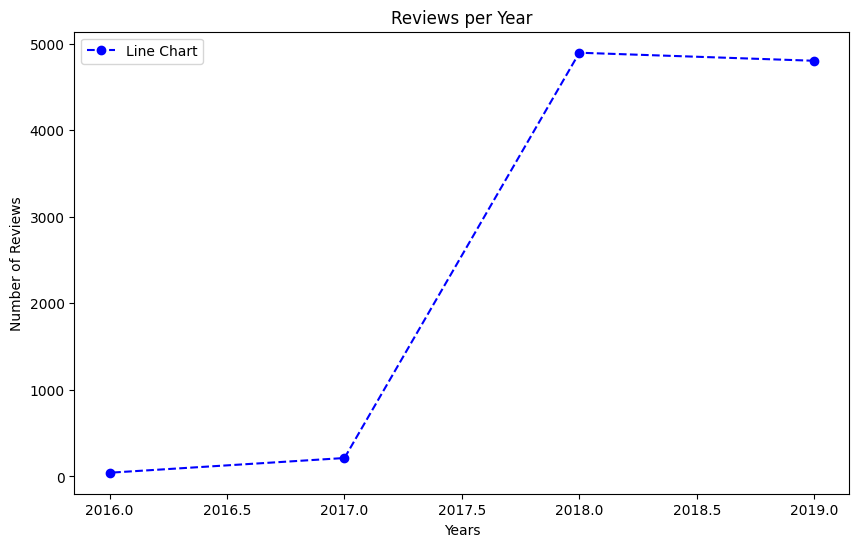

In [ ]:
# Chart - 10 visualization code for see review trend by years
# Fixing the size of the chart
plt.figure(figsize=(10, 6))

x = reviews_on_year_df['Review_Year'].values
y = reviews_on_year_df['Count'].values

# Plotting the line chart
plt.plot(x, y, marker='o', linestyle='--', color='b', label='Line Chart')

# Adding labels and title
plt.xlabel('Years')
plt.ylabel('Number of Reviews')
plt.title('Reviews per Year')

plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

A line chart is used to visualize trends or patterns over a continuous dataset, displaying the relationship between two variables, making it effective for revealing insights into data trends and changes.

##### 2. What is/are the insight(s) found from the chart?

In this chart I can see as the year increases number of reviews is increases, but in 2018 a significant jump in the number of reviews.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It is good, that the number of reviews increased in the year 2018, which means more customers visited restaurants in 2018 and gave their ratings and reviews.

#### Chart - 11 Reviews per Month

In [ ]:
# Creating a data frame to check reviews per month
reviews_based_on_month = merged_data['Review_Month'].value_counts()
reviews_per_month = pd.DataFrame({'Month' : reviews_based_on_month.index, 'Reviews_Count' : reviews_based_on_month.values}).sort_values(
                                'Month', ascending = True).reset_index(drop=True)
reviews_per_month

Month  Reviews_Count
0       1            652
1       2            719
2       3           1065
3       4           1247
4       5           1542
5       6            292
6       7           1326
7       8            675
8       9            645
9      10            629
10     11            569
11     12            594

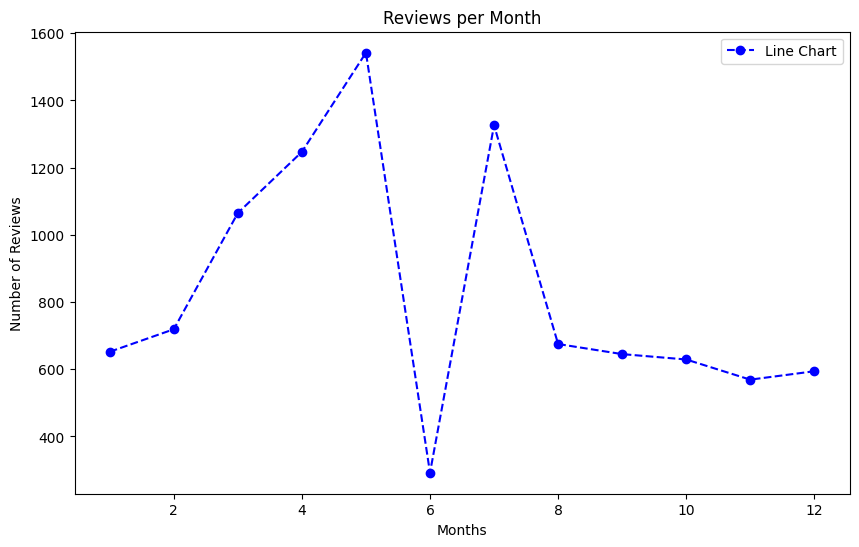

In [ ]:
# Chart - 11 visualization code for see review trend by month
# Fixing the size of the chart
plt.figure(figsize=(10, 6))

x = reviews_per_month['Month'].values
y = reviews_per_month['Reviews_Count'].values

# Plotting the line chart
plt.plot(x, y, marker='o', linestyle='--', color='b', label='Line Chart')

# Adding labels and title
plt.xlabel('Months')
plt.ylabel('Number of Reviews')
plt.title('Reviews per Month')

plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

A line chart is used to visualize trends or patterns over a continuous dataset, displaying the relationship between two variables, making it effective for revealing insights into data trends and changes.

##### 2. What is/are the insight(s) found from the chart?

From January to May number of reviews increased and in May highest number of reviews was 1542, then in July month number of reviews increased, and after August number of reviews decreased continuously. but in June number of reviews was very low maybe because in summar no one want to go outside of the home.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In June month very low reviews mean fewer people visited restaurants in June, which is not good, to attract more people in June we can give some discount offers in June.

#### Chart - 12 Reviews per Hour

In [ ]:
# Creating a dataframe to check the number of reviews getting on which hour
Review_on_hour = merged_data['Review_Hour'].value_counts()
reviews_per_hour = pd.DataFrame({"Hours" : Review_on_hour.index, "Reviews_Count" : Review_on_hour.values}).sort_values("Hours", ascending = True).reset_index(drop = True)
reviews_per_hour

Hours  Reviews_Count
0       0            509
1       1            313
2       2            167
3       3            102
4       4             55
5       5             39
6       6             44
7       7             78
8       8            134
9       9            171
10     10            229
11     11            308
12     12            460
13     13            580
14     14            776
15     15            645
16     16            548
17     17            480
18     18            437
19     19            522
20     20            714
21     21            875
22     22            967
23     23            802

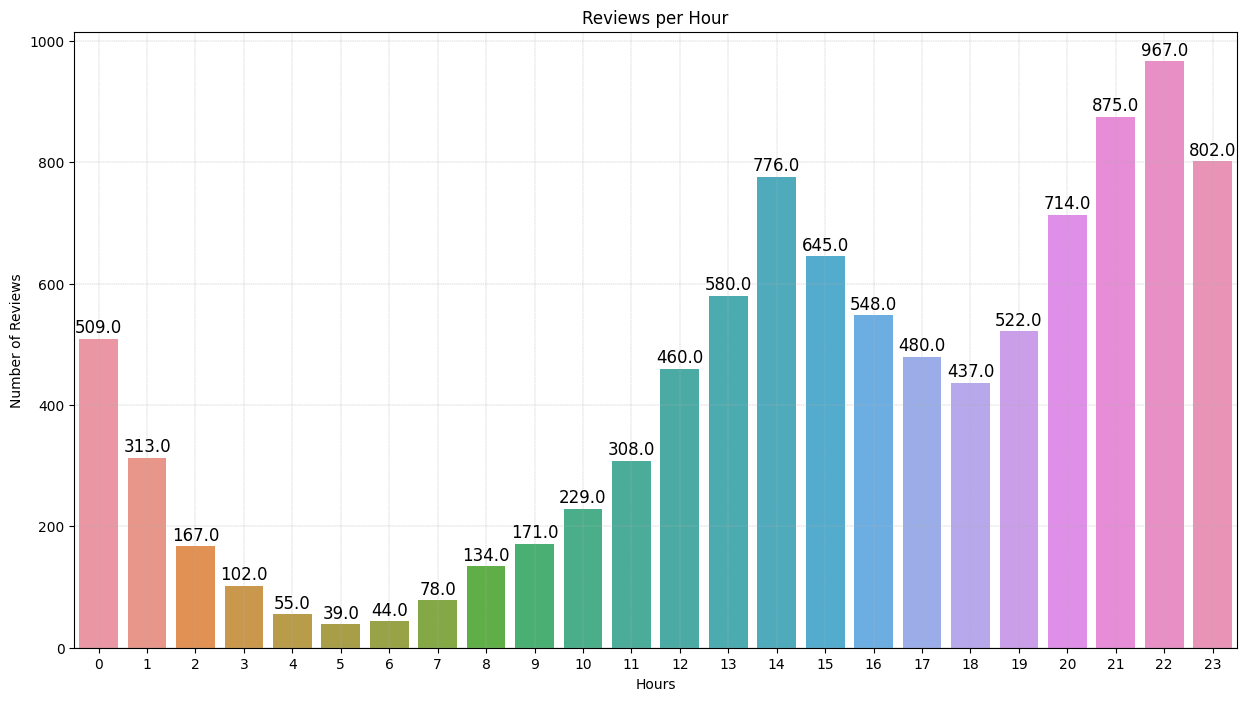

In [ ]:
# # Chart - 12 visualization code to see review trend by hours
# Fixing the size of the chart
plt.figure(figsize=(15,8))
plots= sns.barplot(x=reviews_per_hour['Hours'].values, y=reviews_per_hour['Reviews_Count'].values)
plt.grid(linestyle='--', linewidth=0.3)

for bar in plots.patches:
      plots.annotate(bar.get_height(),
                     (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                     size=12, xytext=(0, 8),
                     textcoords='offset points')

# Adding labels and title
plt.xlabel('Hours')
plt.ylabel('Number of Reviews')
plt.title('Reviews per Hour')
plt.show()

##### 1. Why did you pick the specific chart?


A bar plot is used to visually represent and compare the distribution or values of different categories or groups, making it effective for conveying the relative magnitudes or frequencies of data points within a dataset. It provides a clear and concise way to visualize categorical data.

##### 2. What is/are the insight(s) found from the chart?

The Highest Reviews a restaurant gets are at 10:00 PM and 9'O clock, 11'O clock and 8'O clock, and at Noon at 2:00 PM Most of the reviews are done by customers. but it's interesting customers are also given ratings in the early morning.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It is good for business we are getting every time reviews even in the early morning and it will impact a lot in making new business.

#### Chart - 13 Average Restaurant Ratings

In [ ]:
# Chart - 13 visualization code for Distribution of Average Ratings in Hyderabad
sns.histplot(x=avg_hotel_rating['Rating'])
plt.xlabel('Average Rating',size=8)
plt.title('Distribution of Average Restaurant Ratings in Hyderabad',size=10)

Text(0.5, 1.0, 'Distribution of Average Restaurant Ratings in Hyderabad')

##### 1. Why did you pick the specific chart?


A histplot is employed to illustrate the distribution of a single variable, presenting the frequency or density of values within predefined intervals and (bins), providing insights into the data's central tendency, spread, and shape.

##### 2. What is/are the insight(s) found from the chart?

Few restaurants in the original restaurant dataset have not been rated by the people yet, most restaurants have ratings between 3.5 and 4.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Efforts should be made by the company to improve the existing restaurants by pushing them to act on the reviews and to include restaurants with better services in the future to improve overall rating distribution.

#### Chart - 14 - Correlation Heatmap

In [ ]:
# List of numeric columns
Numeric_Columns = ['Cost', 'Rating', 'Pictures', 'Reviewer_Total_Review', 'Reviewer_Followers', 'Review_Year', 'Review_Month', 'Review_Hour']

In [ ]:
# Correlation Heatmap visualization code
# Checking heatmap/correlation matrix to see the how the columns are correlated with each other
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(merged_data[Numeric_Columns].corr(),ax = ax, annot=True, cmap = 'cividis', linewidths = 1)
plt.show()


##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

##### 2. What is/are the insight(s) found from the chart?

From the above correlation heatmap, it can be depicted that few features are correlated, like Reviewer_Total_Review is related to Reviewer_Followers and Reviewer_Total_Review is related to Pictures. and Review_year and Review_Month are highly nagetevely correlated

Rest all correlations can be depicted from the above chart.

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(merged_data)

##### 1. Why did you pick the specific chart?

A Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or making linear separations in our data set.

Thus, I used a pair plot to analyse the patterns of data and the relationship between the features. It's the same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

It can be seen that there is no significant correlation between the given features in the merged_data data frame.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

- The cost of a restaurant is positively correlated with the rating it receives.
- Restaurants that are reviewed by reviewers with more followers will have a higher rating.
- Restaurants that offer a wider variety of cuisines will have a higher rating.

### Hypothetical Statement - 1

The cost of a restaurant is positively correlated with the rating it receives.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: There is no relationship between the cost of restaurant and the rating it receives. (H0: 𝛽1 = 0)
* Alternative hypothesis: There is a positive relationship between the cost of a restaurant and the rating it receives. (H1: 𝛽1 > 0)
* Test : Simple Linear Regression Analysis

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf


# fit the linear model
model = smf.ols(formula='Rating ~ Cost', data= merged_data).fit()

# Check p-value of coefficient
p_value = model.pvalues[1]
if p_value < 0.05:
    print("Reject Null Hypothesis - There is no relationship between the cost of\
 restaurant and the rating it receives.")
else:
    print("Fail to reject Null Hypothesis - There is a positive relationship \
 between the cost of a restaurant and the rating it receives.")

Reject Null Hypothesis - There is no relationship between the cost of restaurant and the rating it receives.


##### Which statistical test have you done to obtain P-Value?

I have used a Linear regression test to check the relationship between the cost of a restaurant and its rating.

##### Why did you choose the specific statistical test?

I chose this test because it is a common and straightforward method for testing the relationship between two continuous variables. This would involve fitting a linear model with the rating as the dependent variable and the cost as the independent variable. The p-value of the coefficient for the cost variable can then be used to determine if there is a statistically significant relationship between the two variables.

### Hypothetical Statement - 2

Restaurants that are reviewed by reviewers with more followers will have a higher rating.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null hypothesis: The number of followers a reviewer has no effect on the rating of a restaurant. (H0: 𝛽1 = 0)
- Alternative hypothesis: Alternative Hypothesis: The number of followers a reviewer has a positive effect on the rating of a restaurant. (H1: 𝛽1 > 0)
- Test: Simple Linear Regression test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf


# fit the linear model
model = smf.ols(formula='Rating ~ Reviewer_Followers', data = merged_data).fit()

# print the summary of the model
# print(model.summary())

# extract p-value of coefficient for Reviewer_Followers
p_value = model.pvalues[1]

if p_value < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

For the second hypothesis, I have used Simple Linear Regression Test.

##### Why did you choose the specific statistical test?

I choose this test because it is a straightforward method for testing the relationship between two continuous variables. It assumes that there is a linear relationship between the independent variable (Reviewer_Followers) and the dependent variable (Rating) and it allows us to estimate the strength and direction of that relationship. It also allows us to test the null hypothesis that there is no relationship between the two variables by testing the p-value of the coefficient of the independent variable.

### Hypothetical Statement - 3

Restaurants that offer a wider variety of cuisines will have a higher rating.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null hypothesis: The variety of cuisines offered by a restaurant has no effect on its rating. (H0: 𝛽3 = 0)
- Alternative hypothesis: The variety of cuisines offered by a restaurant has a positive effect on its rating. (H1: 𝛽3 > 0)
- Test : Chi-Squared Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# create a contingency table
ct = pd.crosstab(merged_data['Cuisines'], merged_data['Rating'])

# perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ct)

# Check p-value
if p < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

For the third hypothesis, I have used chi-squared test for independence to test the relationship between the variety of cuisines offered by a restaurant and its rating.

##### Why did you choose the specific statistical test?

I choose this test because it is suitable for comparing the relationship between two categorical variables. This would involve creating a contingency table with the number of restaurants that offer each cuisine as the rows and the rating of the restaurant as the columns.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [329]:
# Handling Missing Values & Missing Value Imputation
merged_data.isnull().sum()

Restaurant                  0
Cost                        0
Cuisines                    0
Timings                     0
Reviewer                    0
Review                      0
Rating                      0
Metadata                    0
Time                        0
Pictures                    0
Reviewer_Total_Review       0
Reviewer_Followers       1574
Review_Year                 0
Review_Month                0
Review_Hour                 0
dtype: int64

In [330]:
# Filling null values in Reviewer_Followers column
merged_data = merged_data.fillna({ "Reviewer_Followers": 0})

In [331]:
# Checking the null values in dataset
merged_data.isnull().sum()

Restaurant               0
Cost                     0
Cuisines                 0
Timings                  0
Reviewer                 0
Review                   0
Rating                   0
Metadata                 0
Time                     0
Pictures                 0
Reviewer_Total_Review    0
Reviewer_Followers       0
Review_Year              0
Review_Month             0
Review_Hour              0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Most of the Null Values I already treated in the data wrangling part are this.

The Dataset that contains details about restaurants, had 1 null value in the timing feature and more than 50% null value in the collection feature. To treat those I first replaced the null value for timing with mode since there was only one null and mode is robust to outliers plus the restaurant name was one unique feature that had all other features except timing and collection so it was better to preserve that data. Since there were more than 50% null values in the collection feature, I removed the entire column because columns with high a percentage of null values are likely to have a lot of missing data, which can make it difficult to accurately analyze or make predictions based on the data.

Then I first removed the duplicate data where all other values were NaN or null values except had restaurant name, so instead of replacing each null value, I removed it as it was only 36 duplicate data that had no unique identity.

Then I Again checked null values in the Feature Engineering & Data Pre-processing part in my merged_data data frame and I found a null value in the Reviewer_Followers column is 1574, Reviewer_Followers which I created in the data wrangling part, So, I changed null values with zeros.


all the null values were treated, at the end, I don't have null values in my dataset.

### 2. Handling Outliers

In [332]:
# Storing the continous value feature in a separate list
continous_value_feature = ['Cost', 'Rating', 'Pictures', 'Reviewer_Total_Review', 'Reviewer_Followers', 'Review_Year', 'Review_Month', 'Review_Hour']

# checking outliers with the help of box plot for continous features
plt.figure(figsize=(16,5))
for n,column in enumerate(continous_value_feature):
  plt.subplot(1, 8, n+1)
  sns.boxplot(merged_data[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [333]:
# Importing IsolationForest
from sklearn.ensemble import IsolationForest

In [334]:
# Isolation forest for anamoly detection on cost
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merged_data['Cost'].values.reshape(-1, 1))
merged_data['anomaly_score_univariate_Cost'] = isolation_forest.decision_function(merged_data['Cost'].values.reshape(-1, 1))
merged_data['outlier_univariate_Cost'] = isolation_forest.predict(merged_data['Cost'].values.reshape(-1, 1))

In [335]:
# Chart to visualize outliers
xx = np.linspace(merged_data['Cost'].min(), merged_data['Cost'].max(), len(merged_data)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Cost')
plt.show();

In [336]:
# Isolation forest for anamoly detection of Pictures
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merged_data['Pictures'].values.reshape(-1, 1))
merged_data['anomaly_score_univariate_Pictures'] = isolation_forest.decision_function(
    merged_data['Pictures'].values.reshape(-1, 1))
merged_data['outlier_univariate_Pictures'] = isolation_forest.predict(
    merged_data['Pictures'].values.reshape(-1, 1))

In [337]:
# Chat to visualize outliers in Pictures column
xx = np.linspace(merged_data['Pictures'].min(), merged_data['Pictures'].max(), len(merged_data)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Pictures')
plt.show();

In [338]:
# Isolation forest for anamoly detection of Reviewer_Total_Review
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merged_data['Reviewer_Total_Review'].values.reshape(-1, 1))
merged_data['anomaly_score_univariate_Reviewer_Total_Review'] = isolation_forest.decision_function(
    merged_data['Reviewer_Total_Review'].values.reshape(-1, 1))
merged_data['outlier_univariate_Reviewer_Total_Review'] = isolation_forest.predict(
    merged_data['Reviewer_Total_Review'].values.reshape(-1, 1))

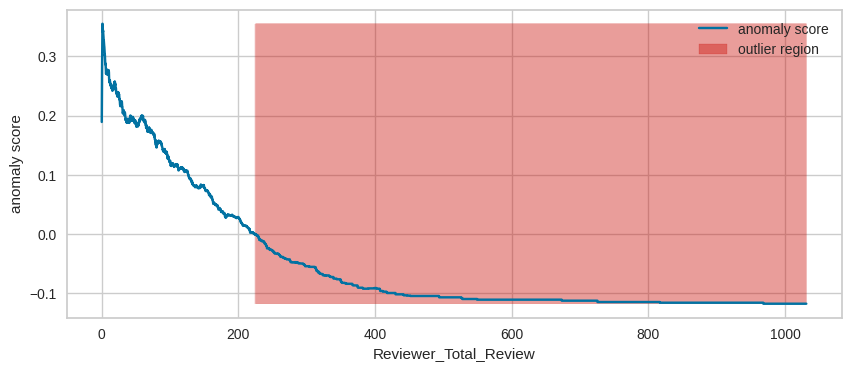

In [339]:
# Chat to visualize outliers in Reviewer_Total_Review column
xx = np.linspace(merged_data['Reviewer_Total_Review'].min(), merged_data['Reviewer_Total_Review'].max(), len(merged_data)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Reviewer_Total_Review')
plt.show();

In [340]:
# Isolation forest for anamoly detection of Reviewer_Followers
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merged_data['Reviewer_Followers'].values.reshape(-1, 1))
merged_data['anomaly_score_univariate_follower'] = isolation_forest.decision_function(
    merged_data['Reviewer_Followers'].values.reshape(-1, 1))
merged_data['outlier_univariate_follower'] = isolation_forest.predict(
    merged_data['Reviewer_Followers'].values.reshape(-1, 1))

In [341]:
# Chat to visualize outliers in Reviewer_Followers column
xx = np.linspace(merged_data['Reviewer_Followers'].min(), merged_data['Reviewer_Followers'].max(), len(merged_data)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Reviewer_Followers')
plt.show();

In [342]:
# Handling Outliers & Outlier treatments
# To separate the symmetric distributed features and skew symmetric distributed features
symmetric_feature = []
non_symmetric_feature = []

for i in merged_data.describe().columns:
    # Checking if the column has a numeric data type
    if pd.api.types.is_numeric_dtype(merged_data[i]):
        # Using a proportionate threshold, for example, 10% of the mean
        threshold = 0.1 * merged_data[i].mean()

        if abs(merged_data[i].mean() - merged_data[i].median()) < threshold:
            symmetric_feature.append(i)
        else:
            non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features: ", symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features: ", non_symmetric_feature)


Symmetric Distributed Features:  ['Review_Year', 'Review_Hour', 'anomaly_score_univariate_Cost', 'outlier_univariate_Cost', 'outlier_univariate_Pictures', 'anomaly_score_univariate_Reviewer_Total_Review', 'outlier_univariate_Reviewer_Total_Review', 'outlier_univariate_follower']
Skew Symmetric Distributed Features:  ['Cost', 'Rating', 'Pictures', 'Reviewer_Total_Review', 'Reviewer_Followers', 'Review_Month', 'anomaly_score_univariate_Pictures', 'anomaly_score_univariate_follower']


In [343]:
# For Skew Symmetric features defining upper and lower boundary
# Outer Fence
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)- 1.5*IQR
  upper_bridge =df[feature].quantile(0.75)+ 1.5*IQR
  # print(f'upper: {upper_bridge} lower : {lower_bridge}')
  return upper_bridge,lower_bridge

In [344]:
# Restricting the data to lower and upper boundary for cost in hotel dataset
# lower limit capping
hotel.loc[hotel['Cost']<= outlier_treatment_skew(df=hotel,
  feature='Cost')[1], 'Cost']=outlier_treatment_skew(df=hotel,feature='Cost')[1]

# upper limit capping
hotel.loc[hotel['Cost']>= outlier_treatment_skew(df=hotel,
  feature='Cost')[0], 'Cost']=outlier_treatment_skew(df=hotel,feature='Cost')[0]

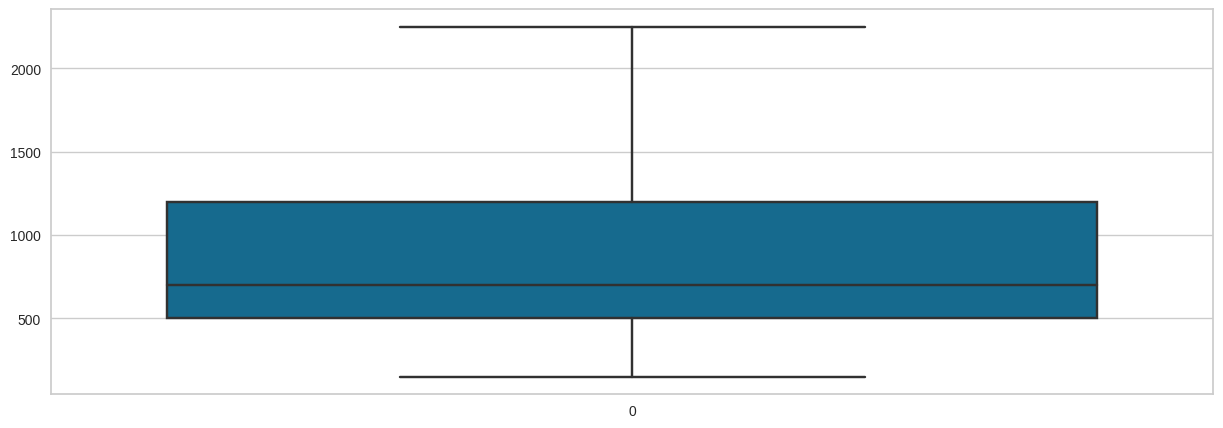

In [345]:
# Fixing the Size
plt.figure(figsize=(15,5))
# Creating a boxplot for variables
sns.boxplot(data=hotel['Cost'])

# Show the plot
plt.show()

In [346]:
# Restricting the data to lower and upper boundary for Pictures in review dataset
# lower limit capping
review.loc[review['Pictures']<= outlier_treatment_skew(df=review,
  feature='Pictures')[1], 'Pictures']=outlier_treatment_skew(
      df=review,feature='Pictures')[1]

# upper limit capping
review.loc[review['Pictures']>= outlier_treatment_skew(df=review,
  feature='Pictures')[0], 'Pictures']=outlier_treatment_skew(
      df=review,feature='Pictures')[0]


# Restricting the data to lower and upper boundary for Reviewer_Total_Review in review dataset
# lower limit capping
review.loc[review['Reviewer_Total_Review']<= outlier_treatment_skew(df=review,
  feature='Reviewer_Total_Review')[1], 'Reviewer_Total_Review']=outlier_treatment_skew(
      df=review,feature='Reviewer_Total_Review')[1]

# upper limit capping
review.loc[review['Reviewer_Total_Review']>= outlier_treatment_skew(df=review,
  feature='Reviewer_Total_Review')[0], 'Reviewer_Total_Review']=outlier_treatment_skew(
      df=review,feature='Reviewer_Total_Review')[0]


# Restricting the data to lower and upper boundary for Reviewer_Followers in review dataset
# lower limit capping
review.loc[review['Reviewer_Followers']<= outlier_treatment_skew(df=review,
  feature='Reviewer_Followers')[1], 'Reviewer_Followers']=outlier_treatment_skew(
      df=review,feature='Reviewer_Followers')[1]

# upper limit capping
review.loc[review['Reviewer_Followers']>= outlier_treatment_skew(df=review,
  feature='Reviewer_Followers')[0], 'Reviewer_Followers']=outlier_treatment_skew(
      df=review,feature='Reviewer_Followers')[0]

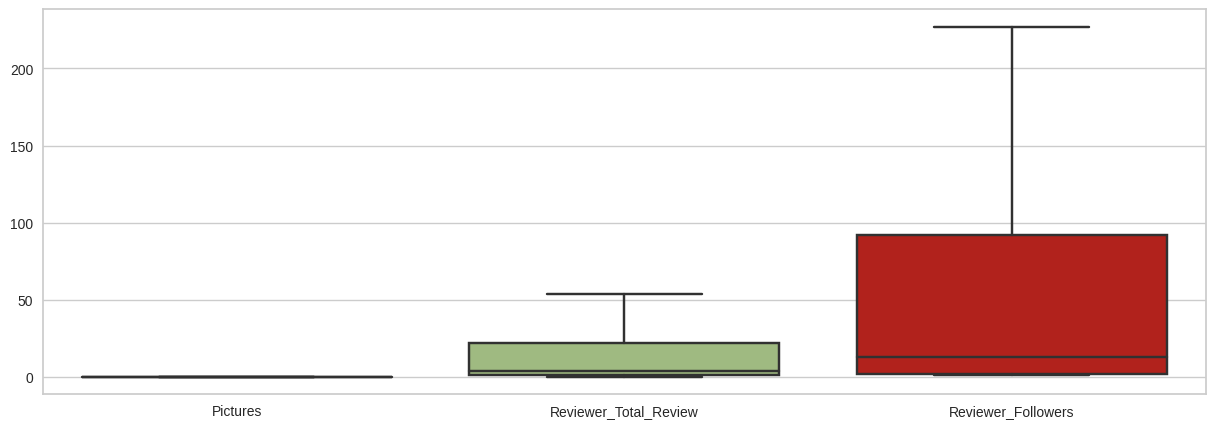

In [347]:
# Creating List of Numeric Columns
columns = [ 'Pictures', 'Reviewer_Total_Review', 'Reviewer_Followers']

plt.figure(figsize=(15,5))
# Creating a boxplot for variables
sns.boxplot(data=review[columns])

# Show the plot
plt.show()

In [348]:
# Dropping the columns created while outliers treatment
merged_data.drop(columns =['anomaly_score_univariate_Cost', 'outlier_univariate_Cost',
                           'anomaly_score_univariate_Pictures', 'outlier_univariate_Pictures',
                           'anomaly_score_univariate_Reviewer_Total_Review', 'outlier_univariate_Reviewer_Total_Review',
                          'anomaly_score_univariate_follower', 'outlier_univariate_follower'], inplace = True)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Since Cost, Pictures, Reviewer_Total_Review, and Reviewer_Followers features using isolation forest found they have outliers, hence using the capping technique instead of removing the outliers, capped outliers with the highest and lowest limit using IQR method.

### 3. Categorical Encoding

In [349]:
# Encode your categorical columns

# Categorial encoding using pd.getdummies
# New df with important categories
cluster_dummy = hotel[['Restaurant','Cuisines']]
# Spliting cuisines as they are separted with comma and converting into list
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].str.split(',')
# Using explode converting list to unique individual items
cluster_dummy = cluster_dummy.explode('Cuisines')
# Removing extra trailing space from cuisines after exploded
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].apply(lambda x: x.strip())
# Using get dummies to get dummies for cuisines
cluster_dummy = pd.get_dummies(cluster_dummy, columns=["Cuisines"], prefix=["Cuisines"])

# Checking if the values are correct
# cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].eq(1)[:5].T
cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].idxmax(1)[:6]

# Replacing cuisines_ from columns name - for better understanding run seperatly

# cluster_dummy.columns = cluster_dummy.columns.str.replace(" ","")
cluster_dummy.columns = cluster_dummy.columns.str.replace("Cuisines_","")
# cluster_dummy = cluster_dummy.groupby(cluster_dummy.columns, axis=1).sum()

# Grouping each restaurant as explode created unnecessary rows
cluster_dummy = cluster_dummy.groupby("Restaurant").sum().reset_index()


In [350]:
# Total cuisine count
hotel['Total_Cuisine_Count'] = hotel['Cuisines'].apply(lambda x : len(x.split(',')))

In [351]:
# Adding average rating - will remove 5 unrated restaurant from 105 restaurant
avg_hotel_rating.rename(columns = {'Rating':'Average_Rating'}, inplace =True)
hotel = hotel.merge(avg_hotel_rating[['Average_Rating','Restaurant']], on = 'Restaurant')
hotel.head(1)

Restaurant  Cost                                           Cuisines  \
0  Beyond Flavours   800  Chinese, Continental, Kebab, European, South I...   

                                         Timings  Total_Cuisine_Count  \
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)                    6   

   Average_Rating  
0            4.28

In [352]:
# Adding cost column to the new dataset
cluster_dummy = hotel[['Restaurant','Cost','Average_Rating','Total_Cuisine_Count'
                      ]].merge(cluster_dummy, on = 'Restaurant')
# Checking head
cluster_dummy.head(2)

Restaurant  Cost  Average_Rating  Total_Cuisine_Count  American  \
0  Beyond Flavours   800            4.28                    6         0   
1         Paradise   800            4.70                    3         0   

   Andhra  Arabian  Asian  BBQ  Bakery  ...  North Indian  Pizza  Salad  \
0       0        0      0    0       0  ...             1      0      0   
1       0        0      0    0       0  ...             1      0      0   

   Seafood  South Indian  Spanish  Street Food  Sushi  Thai  Wraps  
0        0             1        0            0      0     0      0  
1        0             0        0            0      0     0      0  

[2 rows x 48 columns]

In [353]:
# shape of the cluster_dummy
cluster_dummy.shape

(100, 48)

**Alternate Method for creating dummies**

In [354]:
# Creating data frame for categorial encoding
cluster_df = hotel[['Restaurant', 'Cuisines', 'Cost', 'Average_Rating', 'Total_Cuisine_Count']]

In [355]:
# Creating new dataframe for clustering
cluster_df = pd.concat([cluster_df,pd.DataFrame(columns=list(cuisine_dict.keys()))])

In [356]:
# Creating categorial features for cuisine
# Iterate over every row in the dataframe
for i, row in cluster_df.iterrows():
  # iterate over the new columns
  for column in list(cluster_df.columns):
      if column not in ['Restaurant', 'Cost', 'Cuisines', 'Average_Rating', 'Total_Cuisine_Count']:
        # checking if the column is in the list of cuisines available for that row
        if column in row['Cuisines']:
          #assign it as 1 else 0
          cluster_df.loc[i,column] = 1
        else:
          cluster_df.loc[i,column] = 0

In [357]:
# Result from encoding
cluster_df.head(2)

Restaurant                                           Cuisines   Cost  \
0  Beyond Flavours  Chinese, Continental, Kebab, European, South I...  800.0   
1         Paradise                     Biryani, North Indian, Chinese  800.0   

   Average_Rating  Total_Cuisine_Count Chinese Continental Kebab European  \
0            4.28                  6.0       1           1     1        1   
1            4.70                  3.0       1           0     0        0   

  South Indian  ... Spanish Wraps Thai Indonesian Modern Indian Momos Pizza  \
0            1  ...       0     0    0          0             0     0     0   
1            0  ...       0     0    0          0             0     0     0   

  North Eastern Mithai Malaysian  
0             0      0         0  
1             0      0         0  

[2 rows x 49 columns]

#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used one hot encoding on the cuisine category and based on the cuisine if present I gave a value of 1 and if absent gave a value of 0.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [358]:
# Creating a new data frame for text processing of sentiment analysis
sentiment_df = review[['Reviewer','Restaurant','Rating','Review']]
# Checking two random sample
sentiment_df.sample(2)

Reviewer        Restaurant  Rating  \
1793        Juveria Syed  Hotel Zara Hi-Fi     1.0   
4813  Kaushik Padmanaban    Udipi's Upahar     4.0   

                                                 Review  
1793  I have had the worst food from this restaurant...  
4813  When I first reached Hyderabad, I wanted to ea...

In [359]:
# Setting index
sentiment_df = sentiment_df.reset_index()
sentiment_df['index'] = sentiment_df.index

In [360]:
# Checking rows
sentiment_df.head(2)

index              Reviewer       Restaurant  Rating  \
0      0     Rusha Chakraborty  Beyond Flavours     5.0   
1      1  Anusha Tirumalaneedi  Beyond Flavours     5.0   

                                              Review  
0  The ambience was good, food was quite good . h...  
1  Ambience is too good for a pleasant evening. S...

In [361]:
# Installing contractions
!pip install contractions

In [362]:
# Expand Contraction
import contractions
# applying fuction for contracting text
sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x:contractions.fix(x))

#### 2. Lower Casing

In [363]:
# Lower Casing
sentiment_df['Review'] = sentiment_df['Review'].str.lower()

In [364]:
# Checking head
sentiment_df.head(2)

index              Reviewer       Restaurant  Rating  \
0      0     Rusha Chakraborty  Beyond Flavours     5.0   
1      1  Anusha Tirumalaneedi  Beyond Flavours     5.0   

                                              Review  
0  the ambience was good, food was quite good . h...  
1  ambience is too good for a pleasant evening. s...

#### 3. Removing Punctuations

In [365]:
# Remove Punctuations
import string
def remove_punctuation(text):
  '''a function for removing punctuation'''

  # replacing the punctuations with no space,
  # which in effect deletes the punctuation marks
  translator = str.maketrans('', '', string.punctuation)
  # return the text stripped of punctuation marks
  return text.translate(translator)

In [366]:
# Remove punctuation using the function created
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)
sentiment_df.sample(5)

index          Reviewer            Restaurant  Rating  \
6626   6626       Parth Gupta          Aromas@11SIX     1.0   
8054   8054     Vaibhav Mehta   Tandoori Food Works     4.0   
6195   6195  Likita.chamakura  Prism Club & Kitchen     4.0   
7764   7764            Lalith    Squeeze @ The Lime     5.0   
9492   9492         Debashree            Desi Bytes     2.0   

                                                 Review  
6626  the ambiance of this place does not justify th...  
8054  some great indian food delivered at my doorste...  
6195  i have been to this place on weekday  the ambi...  
7764  i have always loved the food here and they nev...  
9492                   so less quantity at so high rate

#### 4. Removing URLs & Removing words and digits contain digits.

In [367]:
# Importing re
import re

# Remove URL
def remove_urls(text):
    return re.sub(r"http\S+", "", text)

# Remove Digit
def remove_digits(text):
    return re.sub(r"\d+", "", text)

def remove_emojis(text):
    # This regex will remove any characters in the Unicode "Emoticons" block
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', text)

# Apply the functions to the "Review" column
sentiment_df["Review"] = sentiment_df["Review"].apply(remove_urls)
sentiment_df["Review"] = sentiment_df["Review"].apply(remove_digits)
sentiment_df["Review"] = sentiment_df["Review"].apply(remove_emojis)


#### 5. Removing Stopwords & Removing White spaces

In [368]:
# Remove Stopwords
# extracting the stopwords from nltk library
from nltk.corpus import stopwords
import nltk

# Download stopwords
nltk.download('stopwords')

sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [369]:
# Function to remove stopwords
def delete_stopwords(text):
  '''a function for removing the stopword'''
  # removing the stop words and lowercasing the selected words
  text = [word.lower() for word in text.split() if word.lower() not in sw]
  # joining the list of words with space separator
  return " ".join(text)

In [370]:
# Calling function to remove stopwords
sentiment_df['Review'] = sentiment_df['Review'].apply(delete_stopwords)

In [371]:
# Remove White spaces
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))

In [372]:
# Random sample
sentiment_df.sample(2)

index          Reviewer          Restaurant  Rating  \
7759   7759  Dileep Damisetti  Squeeze @ The Lime     3.0   
8612   8612    Deepali Sharma  The Chocolate Room     1.0   

                                                 Review  
7759            vada getfry inside everything else good  
8612  really disappointed receiving cappuccino order...

In [373]:
# Checking Values In Review
sentiment_df["Review"].value_counts()

good                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         340
nice                                                                                                                                                                                                                                                   

#### 6. Rephrase Text

In [ ]:
# # Rephrase Text
# from transformers import pipeline

# def rephrase_text(original_text):
#     # Load pre-trained GPT-2 model for text generation
#     generator = pipeline('text-generation', model='EleutherAI/gpt-neo-2.7B')

#     # Generate rephrased text
#     rephrased_text = generator(original_text, max_length=50, num_return_sequences=1)[0]['generated_text']

#     return rephrased_text

# # Example usage
# original_text = sentiment_df['Review']
# rephrased_result = rephrase_text(original_text)
# print(f"Original Text: {original_text}")
# print(f"Rephrased Text: {rephrased_result}")

Not using it because it needs so much time and resources.

In [374]:
# Checking sample
sentiment_df.sample(2)

index            Reviewer       Restaurant  Rating  \
3306   3306            Ravalika       Club Rogue     4.0   
5319   5319  Akansha Salampuria  Diners Pavilion     5.0   

                                                 Review  
3306  food ambience service drinks must try place ku...  
5319  visited place friends buffet goodspread good f...

#### 7. Tokenization

In [375]:
# Installing nltk
!pip install nltk

In [376]:
# Importing the nltk and word_tokenize
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [377]:
# Tokenization
sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.word_tokenize)

In [378]:
# Checking Sample
sentiment_df.sample(2)

index              Reviewer                           Restaurant  \
3636   3636  Gopalkrishna Sunkara  Banana Leaf Multicuisine Restaurant   
8621   8621        Joydeep Barman                   The Chocolate Room   

      Rating                                             Review  
3636     4.0  [good, food, buffet, found, much, items, avail...  
8621     3.0  [ordered, chocolate, brownie, online, pic, soo...

In [379]:
# Checking Values in Review
sentiment_df["Review"].value_counts()

[good]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            340
[nice]                                                                                                                                                            

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
#stemming using snowballstemmer
# from nltk.stem import SnowballStemmer

# # Create a stemmer
# stemmer = SnowballStemmer("english")

# def stem_tokens(tokens):
#     stemmed_tokens = [stemmer.stem(token) for token in tokens]
#     return stemmed_tokens

# # Stem the 'Review' column
# sentiment_df['Review'] = sentiment_df['Review'].apply(stem_tokens)

In [380]:
# Applying Lemmatization
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Lemmatize the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [381]:
# Checking the sample
sentiment_df.sample(2)

index               Reviewer       Restaurant  Rating  \
9398   9398      Anil Kumar Ippili   Dunkin' Donuts     5.0   
73       73  Saswati Kar Choudhury  Beyond Flavours     3.0   

                                                 Review  
9398                                             [good]  
73    [happened, go, place, last, sunday, mother, da...

In [382]:
# Checking The Values in Review
sentiment_df["Review"].value_counts()

[good]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   340
[nice]                                                                                                                                                                     

##### Which text normalization technique have you used and why?

I have used Lemmatization as a text normalization technique.

Lemmatization is the process of reducing words to their base or root form, similar to stemming. However, lemmatization uses a dictionary-based approach and considers the context of the word in order to determine its base form, while stemming uses simple heuristics and does not consider the context of the word. Lemmatization is a more accurate way of finding the root form of a word as it takes into account the context of the word as well as its grammatical structure.

I have used lemmatization because it is a more accurate way of reducing words to their base form than stemming. Lemmatization considers the context of the word and its grammatical structure to determine its base form, which can help to improve the performance of natural language processing models. Lemmatization is often used in tasks such as text classification and information retrieval, where the meaning of the words is important.

#### 9. Part of speech tagging

In [383]:
# sentiment_tfid = sentiment_df.copy()

In [384]:
# POS Taging
# sentiment_tfid['Review'] = sentiment_tfid['Review'].apply(nltk.pos_tag)
# sentiment_tfid.head()

Here I am not performing POS tagging as it was taking longer time when training.

Part-of-speech (POS) tagging can be important for sentiment analysis in some cases, as it can provide additional information about the structure and meaning of the text.

For example, certain POS tags, such as adjectives and adverbs, are often used to express sentiment. By identifying these POS tags in the text, a sentiment analysis model can gain a better understanding of the sentiment being expressed. Additionally, certain grammatical structures, such as negations or modals, can change the sentiment of a sentence. By identifying these structures through POS tagging, a sentiment analysis model can take them into account when determining the overall sentiment of the text.

However, it's worth noting that POS tagging is not always necessary for sentiment analysis. In some cases, a model may be able to achieve good performance without using POS tagging. Additionally, the complexity of a model that uses POS tagging increases, which could lead to longer training time and higher computational costs.

#### 10. Text Vectorization

In [385]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
vectorizer.fit(sentiment_df['Review'].values)
# Creating independent variable for sentiment analysis
X_tfidf = vectorizer.transform(sentiment_df['Review'].values)


**Bag of Words**

In [386]:
# Installing and importing gensim
!pip install gensim
import gensim

In [387]:
# Importing ast
import ast

In [388]:
# Bag of Words
tokenized_text = []
for token in sentiment_df['Review']:
    tokenized_text.append(token)

# Creating token dict
tokens_dict = gensim.corpora.Dictionary(tokenized_text)

#print token dict
#tokens_dict.token2id

In [389]:
# Using tokens_dict.doc2bow() to generate BoW features for each tokenized course
texts_bow = [tokens_dict.doc2bow(text) for text in tokenized_text]

# Creating a new text_bow dataframe based on the extracted BoW features
tokens = []
bow_values = []
doc_indices = []
doc_ids = []
for text_idx, text_bow in enumerate(texts_bow):
    for token_index, token_bow in text_bow:
        token = tokens_dict.get(token_index)
        tokens.append(token)
        bow_values.append(token_bow)
        doc_indices.append(text_idx)
        doc_ids.append(sentiment_df["Restaurant"][text_idx])

bow_dict = {"doc_index": doc_indices,
            "doc_id": doc_ids,
            "token": tokens,
            "bow": bow_values,
            }
bows_df = pd.DataFrame(bow_dict)
bows_df.head()

doc_index           doc_id     token  bow
0          0  Beyond Flavours      also    1
1          0  Beyond Flavours  ambience    1
2          0  Beyond Flavours    brunch    1
3          0  Beyond Flavours     chill    1
4          0  Beyond Flavours      cost    1

##### Which text vectorization technique have you used and why?

I have used TFIDF vectorization in place of BAG OF WORDS because Tf-idf vectorization takes into account the importance of each word in a document. TF-IDF also assigns higher values to rare words that are unique to a particular document, making them more important in the representation.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [390]:
# Manipulate Features to minimize feature correlation and create new features
# Creating new binary feature called sentiment based on rating which has 1 = positive and 0 = negative
sentiment_df['Sentiment'] = sentiment_df['Rating'].apply(
    lambda x: 1 if x >= sentiment_df['Rating'].mean() else 0)  #1 = positive # 0 = negative

In [391]:
# Sentiment data frame
sentiment_df.sample(2)

index         Reviewer       Restaurant  Rating  \
3909   3909    Yash Barmecha    Deli 9 Bistro     4.0   
4785   4785  Shubhamjuneja41  Shanghai Chef 2     4.0   

                                                 Review  Sentiment  
3909  [good, place, eat, burger, taste, really, well...          1  
4785  [food, service, good, ordered, lemon, coriande...          1

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting


##### What all feature selection methods have you used  and why?

I will be using PCA for feature selection, which will be again beneficial for dimensional reduction, therefore will do the needful in the preceding step.

The goal of PCA is to identify the most important variables or features that capture the most variation in the data, and then to project the data onto a lower-dimensional space while preserving as much of the variance as possible.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [392]:
# Transform Your data
# Getting symmetric and skew symmetric features from the columns
symmetric_feature=[]
non_symmetric_feature=[]
for i in cluster_dummy.describe().columns:
  if abs(cluster_dummy[i].mean()-cluster_dummy[i].median())<0.1:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['Average_Rating', 'Total_Cuisine_Count', 'American', 'Andhra', 'Arabian', 'BBQ', 'Bakery', 'Beverages', 'Burger', 'Cafe', 'European', 'Finger Food', 'Goan', 'Healthy Food', 'Hyderabadi', 'Ice Cream', 'Indonesian', 'Japanese', 'Juices', 'Kebab', 'Lebanese', 'Malaysian', 'Mediterranean', 'Mexican', 'Mithai', 'Modern Indian', 'Momos', 'Mughlai', 'North Eastern', 'Pizza', 'Salad', 'Seafood', 'South Indian', 'Spanish', 'Street Food', 'Sushi', 'Thai', 'Wraps']
Skew Symmetric Distributed Features : - ['Cost', 'Asian', 'Biryani', 'Chinese', 'Continental', 'Desserts', 'Fast Food', 'Italian', 'North Indian']


In [393]:
# Using log transformation to transform Cost as using capping tends to change median and mean
cluster_df['Cost'] = np.log1p(cluster_df['Cost'])
cluster_dummy['Cost'] = np.log1p(cluster_dummy['Cost'])

In [394]:
# Importing norm
from scipy.stats import norm

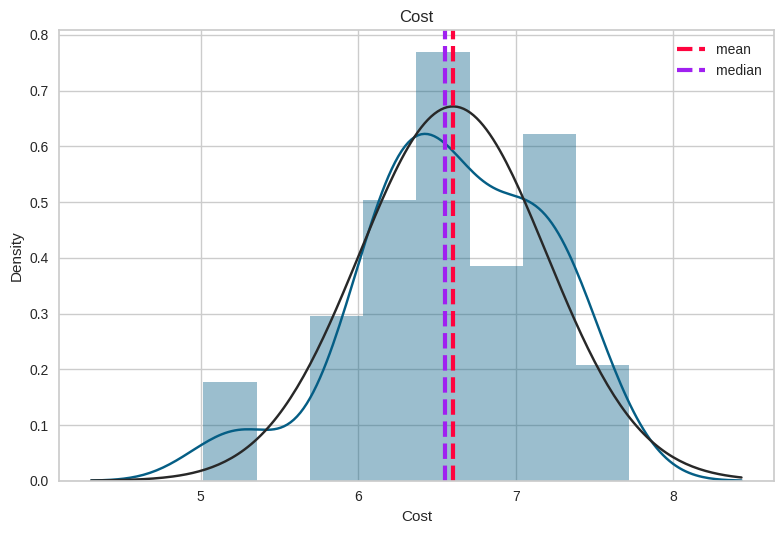

In [395]:
# Transform Your data
for i, col in enumerate(['Cost']):
    sns.distplot(cluster_df[col], color='#055E85', fit=norm)
    feature = cluster_df[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3, label='mean')  # red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3, label='median')  # cyan
    plt.legend(bbox_to_anchor=(1.0, 1), loc='upper right')
    plt.title(f'{col.title()}')
    plt.tight_layout()

### 6. Data Scaling

In [396]:
# Scaling your data
cluster_dummy.sample(5)

Restaurant      Cost  Average_Rating  \
38                       The Glass Onion  7.090910        3.830000   
92  Collage - Hyatt Hyderabad Gachibowli  7.719130        3.410000   
90                          Arena Eleven  7.378384        4.117647   
35             Green Bawarchi Restaurant  6.552508        3.490000   
74                                Faasos  6.398595        3.030000   

    Total_Cuisine_Count  American  Andhra  Arabian  Asian  BBQ  Bakery  ...  \
38                    4         0       0        0      1    0       0  ...   
92                    5         0       0        0      1    0       0  ...   
90                    1         0       0        0      0    0       0  ...   
35                    3         0       0        0      0    0       0  ...   
74                    3         0       0        0      0    0       0  ...   

    North Indian  Pizza  Salad  Seafood  South Indian  Spanish  Street Food  \
38             1      0      0        0             0        0            0   
92             1      0      0        0             0        0            0   
90             0      0      0        0             0        0            0   
35             1      0      0        0             0        0            0   
74             0      0      0        0             0        0            0   

    Sushi  Thai  Wraps  
38      0     0      0  
92      0     0      0  
90      0     0      0  
35      0     0      0  
74      0     0      0  

[5 rows x 48 columns]

In [397]:
# Importing the Standard Scaler
from sklearn.preprocessing import StandardScaler

In [398]:
# Normalizing numerical columns
numerical_cols = ['Cost','Total_Cuisine_Count','Average_Rating']
scaler = StandardScaler()
scaler.fit(cluster_dummy[numerical_cols])
scaled_df = cluster_dummy.copy()
scaled_df[numerical_cols] = scaler.transform(cluster_dummy[numerical_cols])

##### Which method have you used to scale you data and why?

Here I have used a standard scaler as those numerical columns were normally distributed.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, it is important to use dimensionality reduction techniques as dataset has 40 or more features. This is because, as the number of features increases, the computational cost of clustering algorithms also increases. In addition, high dimensionality can lead to the "curse of dimensionality", where the data becomes sparse and the clusters become harder to identify. Dimensionality reduction techniques such as PCA, t-SNE, or LLE can help reduce the number of features while maintaining the important information in the data, making it easier to cluster and interpret the results.

In [399]:
# Impoting PCA
from sklearn.decomposition import PCA

In [400]:
# Dimensionality Reduction (If needed)
# Applying pca
# Setting restaurant feature as index as it still had categorial value
scaled_df.set_index(['Restaurant'],inplace=True)
features = scaled_df.columns
# features = features.drop('Restaurant')
# create an instance of PCA
pca = PCA()

# fit PCA on features
pca.fit(scaled_df[features])


PCA()

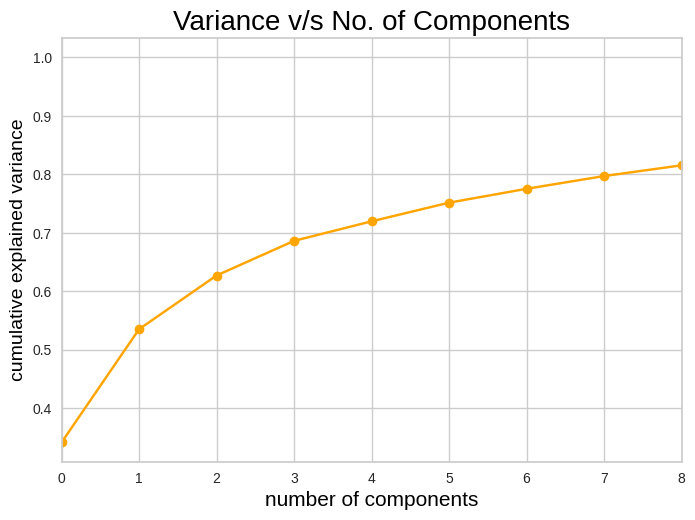

In [401]:
# Explained variance v/s no. of components
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker ='o', color = 'orange')
plt.xlabel('number of components',size = 15, color = 'black')
plt.ylabel('cumulative explained variance',size = 14, color = 'black')
plt.title('Variance v/s No. of Components',size = 20, color = 'black')
plt.xlim([0, 8])
plt.show()

In [402]:
# Using n_component as 16
pca = PCA(n_components=16)

# fit PCA on features
pca.fit(scaled_df[features])

# explained variance ratio of each principal component
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 16 principal components: {:.2%}'.format(
                                        np.sum(pca.explained_variance_ratio_)))

# transform data to principal component space
df_pca = pca.transform(scaled_df[features])

Explained variation per principal component: [0.34165709 0.19362483 0.0918795  0.05923566 0.03338817 0.03192921
 0.02371241 0.02178609 0.01838022 0.01753814 0.01602582 0.01394456
 0.01227635 0.01084668 0.01076994 0.00940641]
Cumulative variance explained by 16 principal components: 90.64%


In [403]:
# Shape
print("original shape: ", scaled_df.shape)
print("transformed shape:", df_pca.shape)

original shape:  (100, 47)
transformed shape: (100, 16)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I have used PCA (Principal Component Analysis) for dimensionality reduction. PCA is a widely used technique for reducing the dimensionality of high-dimensional data sets while retaining most of the information in the original data.

PCA works by finding the principal components of the data, which are linear combinations of the original features that capture the maximum amount of variation in the data. By projecting the data onto these principal components, PCA can reduce the number of dimensions while retaining most of the information in the original data.

PCA is a popular choice for dimensionality reduction because it is simple to implement, computationally efficient, and widely available in most data analysis software packages. Additionally, PCA has been extensively studied and has a strong theoretical foundation, making it a reliable and well-understood method.

### 8. Data Splitting

In [404]:
# Split your data to train and test. Choose Splitting ratio wisely.
# For sentiment analysis using sentiment_df dataframe
x = X_tfidf #from text vectorization
y = sentiment_df['Sentiment']

In [405]:
# spliting test train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# describes info about train and test set
print("Number transactions X_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (7964, 16752)
Number transactions y_train dataset:  (7964,)
Number transactions X_test dataset:  (1991, 16752)
Number transactions y_test dataset:  (1991,)


##### What data splitting ratio have you used and why?

I have used an 80:20 split which is one of the most used split ratios. Since there was only 9961 data, therefore I have used more in the training set.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Using class imbalance ratio (CIR) to measure data imbalance. The CIR is calculated as the ratio of the number of observations in the majority class (Nm) to the number of observations in the minority class (Nm). The CIR can be expressed as CIR = Nm / Ns, where Nm is the number of observations in the majority class and Ns is the number of observations in the minority class.

In [121]:
# Handling Imbalanced Dataset (If needed)
# Getting the value count for target class
vc = sentiment_df.Sentiment.value_counts().reset_index().rename(columns =
            {'index':'Sentiment','Sentiment':'Count'})

In [122]:
# Checking the count
vc

Sentiment  Count
0          1   6269
1          0   3686

In [123]:
# Defining majority and minority class value
majority_class = vc.Count[0]
minority_class = vc.Count[1]

In [124]:
# Calculating cir value for checking class imbalance
CIR = majority_class / minority_class
CIR

1.7007596310363537

In [125]:
# Dependant Variable Column Visualization
sentiment_df['Sentiment'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Positive Sentiment','Negative Sentiment'],
                               colors=['red','blue'],
                               explode=[0.01,0.02]
                              )
plt.show()


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Yes, there is an imbalance in a dataset with a 63: 43 ratio, where 63 is the majority class and 43 is the minority class. Even the CIR score suggests that the majority class is 1.70 times greater than the minority class. However it is considered as a slight imbalance, therefore not performing any under or over-sampling technique i.e., not required to treat class imbalance.

## ***7. ML Model Implementation***

### ML Model - 1 K-Means Clustering

K-means clustering is a type of unsupervised machine learning algorithm used for partitioning a dataset into K clusters based on similarity of data points. The goal of the algorithm is to minimize the sum of squared distances between each data point and its corresponding cluster centroid. It works iteratively by assigning each data point to its nearest centroid and then re-computing the centroid of each cluster based on the new assignments. The algorithm terminates when the cluster assignments no longer change or when a maximum number of iterations is reached.

Let's just itterate over a loop of 1 to 16 clusters and try to find the optimal number of clusters with ELBOW method.

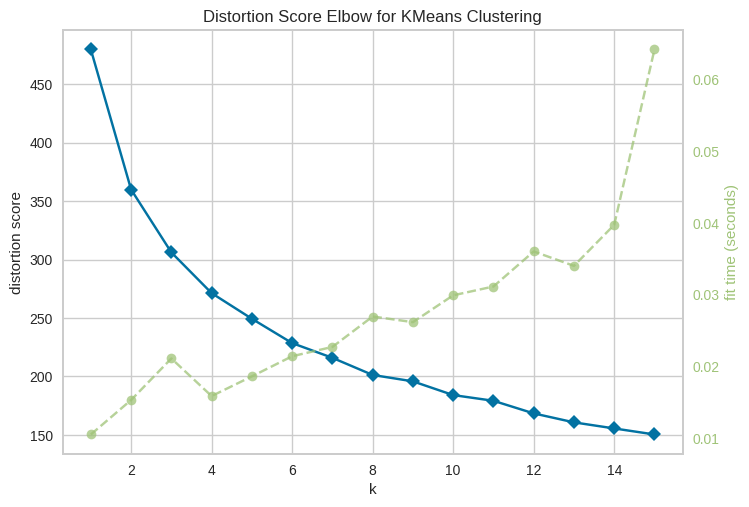

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [406]:
# Determining optimal value of K using KElbowVisualizer
# Importing needed library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1,16),locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(df_pca)

# Finalize and render the figure
visualizer.show()

Here it seems that the elbow is forming at the 3 clusters but before blindly believing it let's plot one more chart that iterates over the same number of cluters and determines the Silhouette Score at every point.

Okay, but what is Silhouette Score?

The silhouette score is a measure of how similar an object is to its cluster compared to other clusters. It is used to evaluate the quality of clustering, where a higher score indicates that objects are more similar to their cluster and dissimilar to other clusters.

The silhouette score ranges from -1 to 1, where a score of 1 indicates that the object is well-matched to its cluster and poorly-matched to neighbouring clusters. Conversely, a score of -1 indicates that the object is poorly matched to its cluster and well-matched to neighbouring clusters.

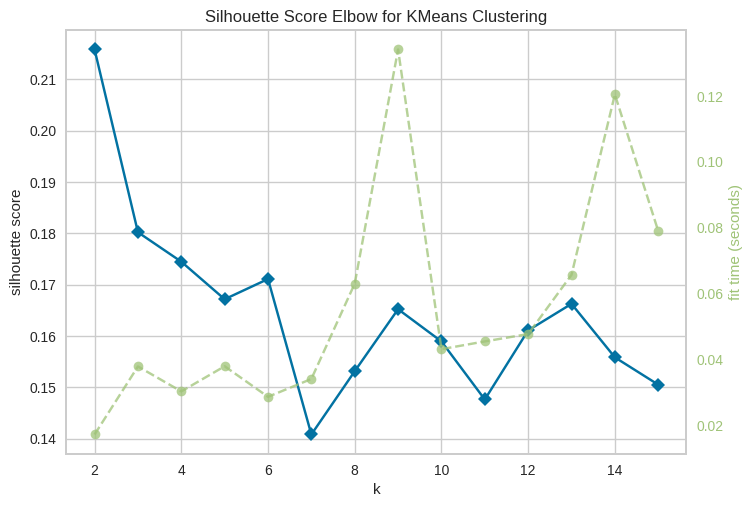

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [407]:
# Determining optimal value of K using KElbowVisualizer
# Importing needed library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(model, k=(2,16), metric='silhouette', timings=True, locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(df_pca)

# Finalize and render the figure
visualizer.show()

In [408]:
# Computing Silhouette score for each k
# Importing needed libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Defining Range
k_range = range(2, 7)
for k in k_range:
    Kmodel = KMeans(n_clusters=k)
    labels = Kmodel.fit_predict(df_pca)
    score = silhouette_score(df_pca, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

k=2, Silhouette score=0.215427
k=3, Silhouette score=0.180231
k=4, Silhouette score=0.171993
k=5, Silhouette score=0.174308
k=6, Silhouette score=0.166774


From the above plots (Elbow plot and Sillhouette plot) it is very clear that the Silhouette score is comparatively good for 3 number of clusters, so we will consider 3 clusters in the k-means analysis.

Now let's plot and see what our data points look like after assigning them to their respective clusters.

In [409]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 0)

#predict the labels of clusters.
plt.figure(figsize=(10,6), dpi=120)
label = kmeans.fit_predict(df_pca)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(df_pca[label == i , 0] , df_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

I have 3 different clusters but unfortunately the above plot is in TWO-DIMENSIONAL. Let's plot the above figure in 3D using mplot3d library and see if we are getting the separated clusters.

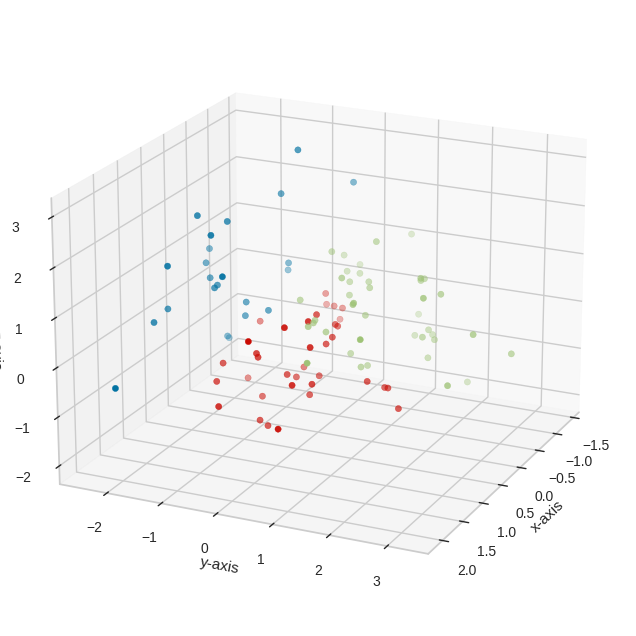

In [410]:
# Importing library to visualize clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b',]
for i in range(len(colors)):
    ax.scatter(df_pca[kmeans.labels_ == i, 2], df_pca[kmeans.labels_ == i, 0], df_pca[kmeans.labels_ == i, 1], c=colors[i])

# Rotate the plot 30 degrees around the X axis and 45 degrees around the Z axis
ax.view_init(elev=20, azim=25)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

In [411]:
# Making dataframe for pca
kmeans_pca_df = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7',
                                              'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14',
                                              'PC15', 'PC16'],index=scaled_df.index)
kmeans_pca_df["label"] = label
kmeans_pca_df.sample(2)

PC1       PC2       PC3       PC4       PC5  \
Restaurant                                                               
eat.fit               0.202613 -1.041561  0.410731  0.109192  1.048997   
Marsala Food Company  0.155919 -0.430065 -0.143696 -0.563349 -0.006851   

                           PC6       PC7       PC8       PC9      PC10  \
Restaurant                                                               
eat.fit              -0.557392 -0.067271  0.084710 -0.773763  0.283425   
Marsala Food Company  0.124426  0.153375 -0.285173  0.065708 -0.291407   

                          PC11      PC12      PC13      PC14      PC15  \
Restaurant                                                               
eat.fit              -0.223552 -0.043508  0.276821  0.262314 -0.062944   
Marsala Food Company  0.075033  0.033967 -0.087617  0.060982  0.000520   

                          PC16  label  
Restaurant                             
eat.fit               0.440358      0  
Marsala Food Company  0.033531      0

In [412]:
# Joining the cluster labels to names dataframe
cluster_dummy.set_index(['Restaurant'],inplace=True)
cluster_dummy = cluster_dummy.join(kmeans_pca_df['label'])
cluster_dummy.sample(2)


Cost  Average_Rating  Total_Cuisine_Count  American  \
Restaurant                                                                 
Behrouz Biryani  6.398595           2.825                    2         0   
Driven Cafe      6.398595           3.745                    3         0   

                 Andhra  Arabian  Asian  BBQ  Bakery  Beverages  ...  Pizza  \
Restaurant                                                       ...          
Behrouz Biryani       0        0      0    0       0          0  ...      0   
Driven Cafe           0        0      0    0       0          1  ...      0   

                 Salad  Seafood  South Indian  Spanish  Street Food  Sushi  \
Restaurant                                                                   
Behrouz Biryani      0        0             0        0            0      0   
Driven Cafe          0        0             0        0            0      0   

                 Thai  Wraps  label  
Restaurant                           
Behrouz Biryani     0      0      1  
Driven Cafe         0      0      1  

[2 rows x 48 columns]

In [413]:
# Changing back cost value to original from log1p done during transformation
cluster_dummy['Cost'] = np.expm1(cluster_dummy['Cost'])
cluster_dummy.sample(2)

Cost  Average_Rating  Total_Cuisine_Count  American  \
Restaurant                                                                  
Gal Punjab Di        800.0            3.61                    2         0   
NorFest - The Dhaba  550.0            4.03                    1         0   

                     Andhra  Arabian  Asian  BBQ  Bakery  Beverages  ...  \
Restaurant                                                           ...   
Gal Punjab Di             0        0      0    0       0          0  ...   
NorFest - The Dhaba       0        0      0    0       0          0  ...   

                     Pizza  Salad  Seafood  South Indian  Spanish  \
Restaurant                                                          
Gal Punjab Di            0      0        0             0        0   
NorFest - The Dhaba      0      0        0             0        0   

                     Street Food  Sushi  Thai  Wraps  label  
Restaurant                                                   
Gal Punjab Di                  0      0     0      0      1  
NorFest - The Dhaba            0      0     0      0      1  

[2 rows x 48 columns]

In [414]:
# Creating dataframe to store cluster data
clustering_result = cluster_dummy.copy().reset_index()
clustering_result = hotel[['Restaurant','Cuisines']].merge(clustering_result[['Restaurant','Cost',
                  'Average_Rating',	'Total_Cuisine_Count','label']], on = 'Restaurant')
clustering_result.head()

Restaurant  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                            Cuisines    Cost  Average_Rating  \
0  Chinese, Continental, Kebab, European, South I...   800.0            4.28   
1                     Biryani, North Indian, Chinese   800.0            4.70   
2       Asian, Mediterranean, North Indian, Desserts  1300.0            4.66   
3  Biryani, North Indian, Chinese, Seafood, Bever...   800.0            3.21   
4  Asian, Continental, North Indian, Chinese, Med...  1200.0            4.34   

   Total_Cuisine_Count  label  
0                    6      2  
1                    3      2  
2                    4      2  
3                    5      0  
4                    5      2

In [415]:
# Counting content in each cluster
clusters_count = cluster_dummy.groupby('label').size().reset_index(name='Total_Restaurant').sort_values(by='label')
clusters_count

label  Total_Restaurant
0      0                36
1      1                41
2      2                23

In [416]:
# Creating a new dataframe for checking cuisines in each cluster
new_cluster_df = clustering_result.copy()
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].str.split(',')
new_cluster_df = new_cluster_df.explode('Cuisines')

# Removing extra trailing space from cuisines after exploded
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].apply(lambda x: x.strip())
new_cluster_df.sample(5)


Restaurant       Cuisines   Cost  Average_Rating  \
82        Al Saba Restaurant        Biryani  750.0        3.136364   
93  Zing's Northeast Kitchen  North Eastern  550.0        3.650000   
33                Club Rogue   North Indian  900.0        2.880000   
0            Beyond Flavours    Continental  800.0        4.280000   
87       American Wild Wings         Burger  600.0        3.974026   

    Total_Cuisine_Count  label  
82                    5      0  
93                    2      1  
33                    2      1  
0                     6      2  
87                    4      0

In [417]:
# Printing cuisine list for each cluster
for cluster in new_cluster_df['label'].unique().tolist():
  print('Cuisine List for Cluster :', cluster,'\n')
  print(new_cluster_df[new_cluster_df["label"]== cluster]['Cuisines'].unique(),'\n')
  print('='*120)

Cuisine List for Cluster : 2 

['Chinese' 'Continental' 'Kebab' 'European' 'South Indian' 'North Indian'
 'Biryani' 'Asian' 'Mediterranean' 'Desserts' 'Seafood' 'Goan' 'BBQ'
 'Japanese' 'Italian' 'Salad' 'Sushi' 'American' 'Spanish' 'Modern Indian'] 

Cuisine List for Cluster : 0 

['Biryani' 'North Indian' 'Chinese' 'Seafood' 'Beverages' 'Healthy Food'
 'Continental' 'South Indian' 'American' 'Kebab' 'Italian' 'Finger Food'
 'Mexican' 'Salad' 'Andhra' 'Bakery' 'Mughlai' 'Juices' 'Arabian'
 'Hyderabadi' 'Thai' 'Indonesian' 'Asian' 'Fast Food' 'Momos' 'Japanese'
 'Sushi' 'Burger' 'Desserts' 'Cafe'] 

Cuisine List for Cluster : 1 

['Lebanese' 'Ice Cream' 'Desserts' 'Street Food' 'North Indian'
 'Fast Food' 'Burger' 'Chinese' 'Continental' 'Mughlai' 'Biryani' 'Cafe'
 'Bakery' 'American' 'Wraps' 'Asian' 'Beverages' 'Hyderabadi'
 'South Indian' 'Kebab' 'Momos' 'Pizza' 'Arabian' 'North Eastern'
 'Seafood'] 



In [418]:
# Creating a new dataframe for checking Cost in each cluster
new_Cost_cluster_df = clustering_result.copy()

# Checking the sample
new_Cost_cluster_df.sample(5)

Restaurant                                           Cuisines  \
54      Asian Meal Box                                              Asian   
82  Al Saba Restaurant  North Indian, Chinese, Seafood, Biryani, Hyder...   
58            Tempteys                                Desserts, Beverages   
84             T Grill             North Indian, Andhra, Biryani, Chinese   
24               SKYHY                 North Indian, Chinese, Continental   

      Cost  Average_Rating  Total_Cuisine_Count  label  
54   200.0        2.580000                    1      1  
82   750.0        3.136364                    5      0  
58   350.0        3.850000                    2      1  
84   700.0        3.170000                    4      0  
24  1400.0        3.370000                    3      0

In [419]:
# Checking mean value of each cluster
Cost_in_every_cluster = new_Cost_cluster_df.groupby('label')['Cost'].mean()

# Creating dataframe
Cost_in_every_cluster = Cost_in_every_cluster.reset_index().rename(columns={"label": "Cluster", "Mean_Cost": "Mean_Price"})

# Print the resulting DataFrame
print(Cost_in_every_cluster)

   Cluster         Cost
0        0   827.777778
1        1   542.682927
2        2  1493.478261


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

I applied K means Clustering to cluster the Restaurants based on the given features. I used both the Elbow and Silhouette Methods to get an efficient number of K, and I discovered that n clusters = 3 were best for my model. The model was then fitted using K means, and each data point was labelled with the cluster to which it belonged using K-means. labels. After labelling the clusters, we visualised them and counted the number of restaurants in each cluster, discovering that the majority of the restaurants belonged to the first cluster.

### ML Model - 2 Hierarchical Clustering

Hierarchical clustering is a type of clustering algorithm used for grouping similar data points into clusters based on their similarity, by recursively merging or dividing clusters based on a measure of similarity or distance between them.

Let's dive into it by plotting a dendrogram and then we will determine the optimal number of clusters.

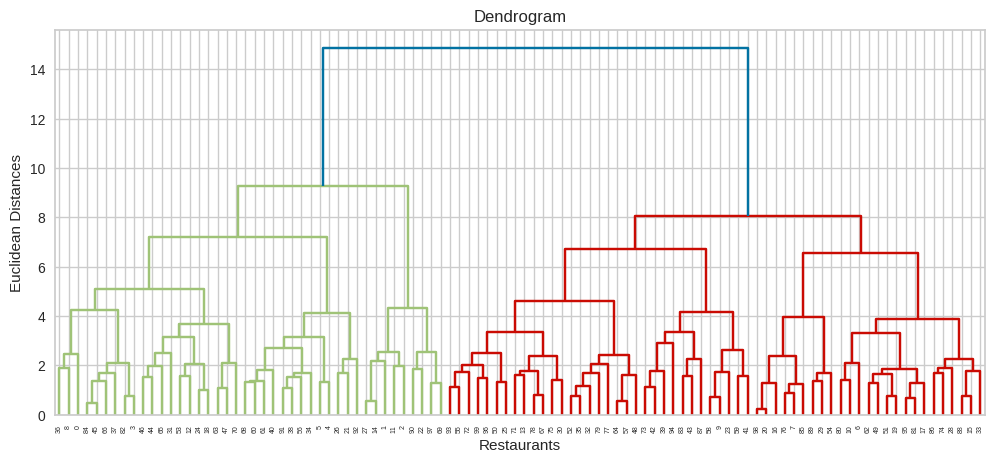

In [420]:
# Importing module for hierarchical clustering and visualizing dendrogram
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,5))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method = 'ward'),orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')

plt.show()

In [421]:
# Checking the Silhouette score for 15 clusters
from sklearn.cluster import AgglomerativeClustering

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(df_pca)
    score = silhouette_score(df_pca, y_hc)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.19802584620201624
For n_clusters = 3, silhouette score is 0.18827962758625646
For n_clusters = 4, silhouette score is 0.13291596156741384
For n_clusters = 5, silhouette score is 0.13399813696264334
For n_clusters = 6, silhouette score is 0.13117160482608956
For n_clusters = 7, silhouette score is 0.14757905186529288
For n_clusters = 8, silhouette score is 0.1526199515678984
For n_clusters = 9, silhouette score is 0.14038702454434782
For n_clusters = 10, silhouette score is 0.14205619842462683
For n_clusters = 11, silhouette score is 0.14438328792032806
For n_clusters = 12, silhouette score is 0.14689715984687848
For n_clusters = 13, silhouette score is 0.1529083233592962
For n_clusters = 14, silhouette score is 0.15299548619809408
For n_clusters = 15, silhouette score is 0.1613850335791419


From the above silhouette scores it is clear that the 2 clusters are optimal values (maximum Silhouette score), which is also clear from the above Dendogram that for 2 clusters the Euclidean distances are maximum.

Let's again plot the chart and observe the 2 different formed clusters.

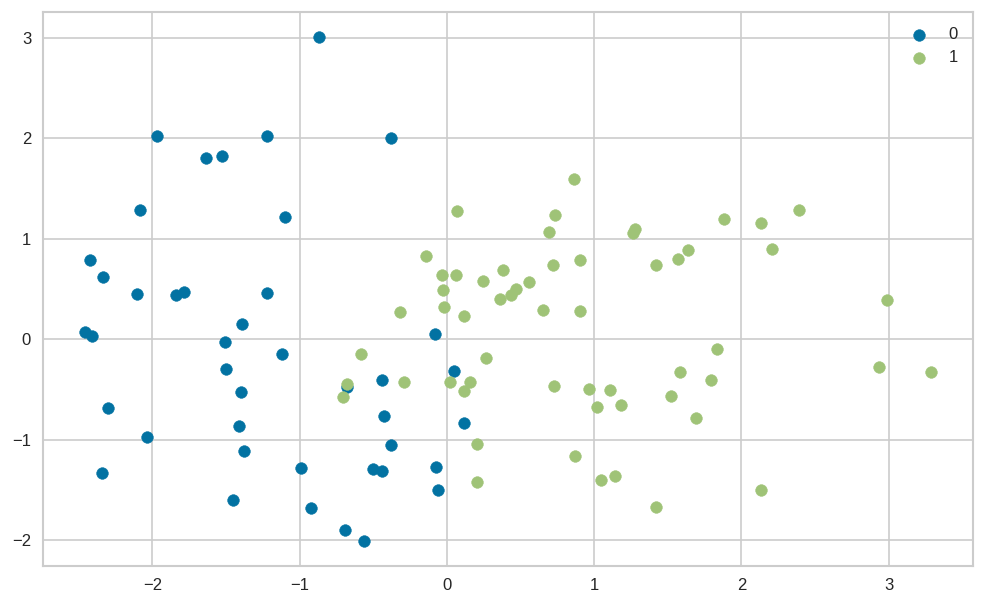

In [422]:
# Training the K-means model on a dataset
Agmodel = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')

# Predict the labels of clusters.
plt.figure(figsize=(10,6), dpi=120)
label = Agmodel.fit_predict(df_pca)
# Getting unique labels
unique_labels = np.unique(label)

# plotting the results:
for i in unique_labels:
    plt.scatter(df_pca[label == i , 0] , df_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

Again plotting the 3 Dimensional plot to see the clusters.

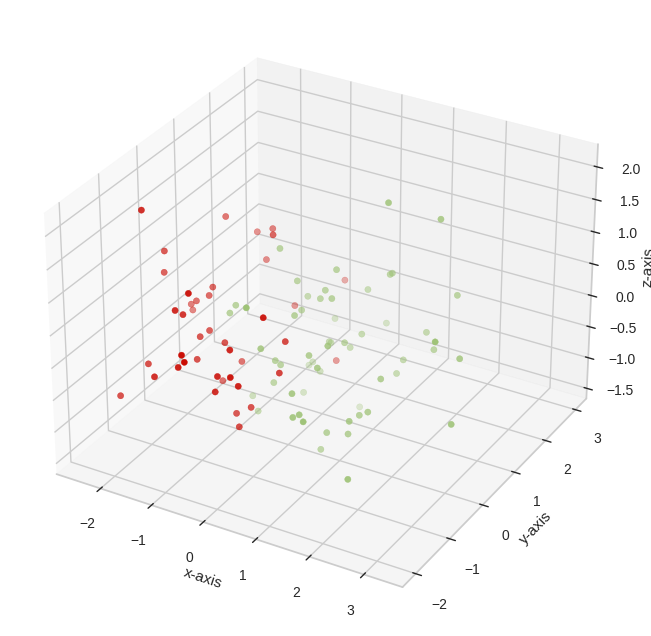

In [423]:
# Importing library to visualize clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y']
for i in range(len(colors)):
    ax.scatter(df_pca[Agmodel.labels_ == i, 0], df_pca[Agmodel.labels_ == i, 1], df_pca[Agmodel.labels_ == i, 2],c=colors[i])
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

In [424]:
# Creating new column for predicting cluster using hierarcial clsutering
# Add cluster values to the dateframe.
clustering_result['agglomerative_cluster'] = Agmodel.labels_

In [425]:
# Checking the sample
clustering_result.sample(5)

Restaurant  \
1                               Paradise   
50                         Gal Punjab Di   
92  Collage - Hyatt Hyderabad Gachibowli   
17                      Hotel Zara Hi-Fi   
93              Zing's Northeast Kitchen   

                                             Cuisines    Cost  Average_Rating  \
1                      Biryani, North Indian, Chinese   800.0            4.70   
50                          North Indian, Continental   800.0            3.61   
92  Continental, Italian, North Indian, Chinese, A...  2250.0            3.41   
17                              Chinese, North Indian   400.0            2.40   
93                               North Eastern, Momos   550.0            3.65   

    Total_Cuisine_Count  label  agglomerative_cluster  
1                     3      2                      0  
50                    2      1                      1  
92                    5      2                      0  
17                    2      1                      1  
93                    2      1                      1

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

I have used the Hierarchical Clustering - Agglomerative Model to cluster the restaurants based on different features. This model uses a Bottom-up approach to cluster the data. I used the Silhouette Coefficient Score and used clusters = 2 and then visualized the clusters and the data points within it.

### ML Model - 3 Sentiment Analysis

**Latent Dirichlet Allocation (LDA)**

In [432]:
from sklearn.decomposition import LatentDirichletAllocation

In [433]:
# Calculating silhouette score for n_component
from sklearn.metrics import silhouette_score

topic_range = range(2, 11)
silhouette_scores = []

for n_components in topic_range:
    lda = LatentDirichletAllocation(n_components=n_components)
    lda.fit(x)
    labels = lda.transform(x).argmax(axis=1)
    silhouette_scores.append(silhouette_score(x, labels))


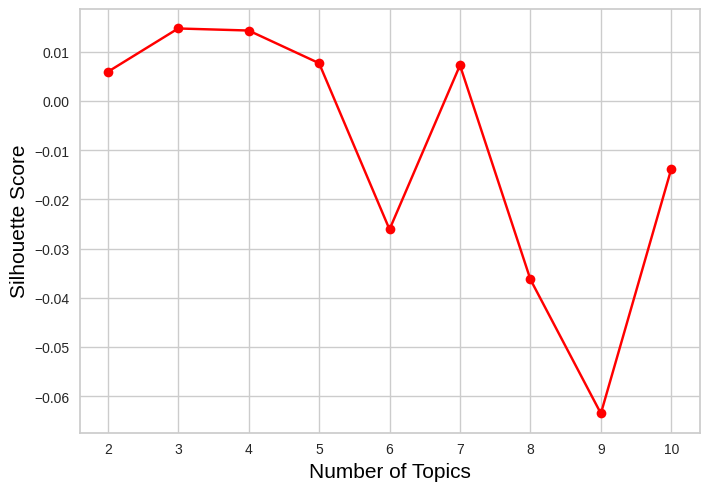

In [435]:
# Plotting silhouette score
plt.plot(topic_range, silhouette_scores, marker ='o', color='red')
plt.xlabel('Number of Topics', size = 15, color = 'black')
plt.ylabel('Silhouette Score', size = 15, color = 'black')
plt.show()

In [436]:
# LDA model
lda = LatentDirichletAllocation(n_components=4)
lda.fit(x)

LatentDirichletAllocation(n_components=4)

In [439]:
# Selecting Columns
selected_columns = ["Restaurant", "Reviewer",	"Review",	"Rating",	"Metadata", "Time", "Pictures"]

# Creating a new DataFrame with selected columns
review_df = reviews_df[selected_columns].copy()

# Checking head
review_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                  Metadata                Time  Pictures  
0   1 Review , 2 Followers 2019-05-25 15:54:00         0  
1  3 Reviews , 2 Followers 2019-05-25 14:20:00         0  
2  2 Reviews , 3 Followers 2019-05-24 22:54:00         0  
3    1 Review , 1 Follower 2019-05-24 22:11:00         0  
4  3 Reviews , 2 Followers 2019-05-24 21:37:00         0

In [440]:
# Creating copy to store predicted sentiments
review_sentiment_prediction = review[review_df.columns.to_list()].copy()
review_sentiment_prediction.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                  Metadata                Time  Pictures  
0   1 Review , 2 Followers 2019-05-25 15:54:00         0  
1  3 Reviews , 2 Followers 2019-05-25 14:20:00         0  
2  2 Reviews , 3 Followers 2019-05-24 22:54:00         0  
3    1 Review , 1 Follower 2019-05-24 22:11:00         0  
4  3 Reviews , 2 Followers 2019-05-24 21:37:00         0

In [441]:
# predicting the sentiments and storing in a feature
topic_results = lda.transform(x)
review_sentiment_prediction['Prediction'] = topic_results.argmax(axis=1)
review_sentiment_prediction.sample(5)


Restaurant              Reviewer  \
4164            Karachi Bakery  Balakrishna Sathaiah   
6113      Prism Club & Kitchen      Alisha Fernandes   
7834                Khaan Saab       Sharanya.naga77   
3023                Pot Pourri      The Other Foodie   
799   Shah Ghouse Spl Shawarma        Suresh Reddy L   

                                                 Review  Rating  \
4164                                  very good service     5.0   
6113  Vijay is very friendly and makes sure u get ur...     5.0   
7834  Went out for Lunch with friends to this place....     4.0   
3023  While scrolling through the 1+1 on food offer ...     4.0   
799   Chicken inside the Shawarma got spoiled and sm...     1.0   

                       Metadata                Time  Pictures  Prediction  
4164                  3 Reviews 2018-07-21 13:40:00         0           2  
6113     1 Review , 2 Followers 2019-04-24 23:55:00         0           1  
7834    5 Reviews , 3 Followers 2019-03-31 12:02:00         0           1  
3023  22 Reviews , 90 Followers 2019-04-18 12:26:00         0           1  
799       1 Review , 1 Follower 2018-09-03 14:50:00         0           1

In [447]:
# Importing WordCloud
from wordcloud import WordCloud

TOP 100 WORDS FOR TOPIC #0


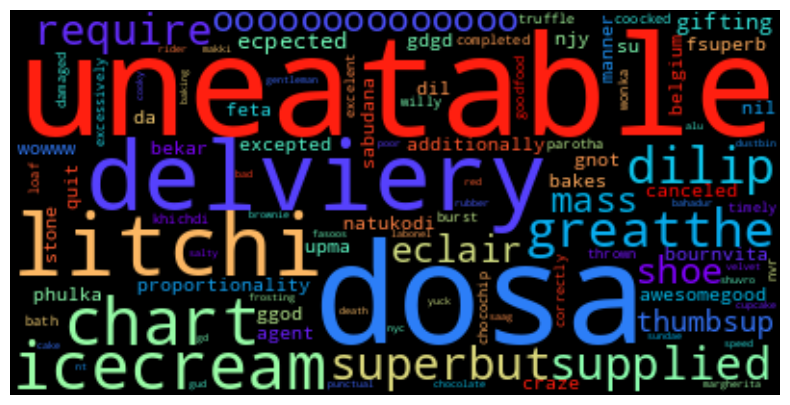

TOP 100 WORDS FOR TOPIC #1


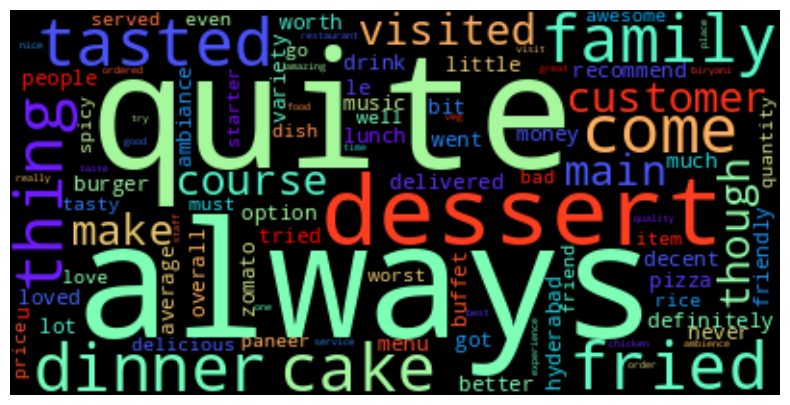

TOP 100 WORDS FOR TOPIC #2


TOP 100 WORDS FOR TOPIC #3


In [446]:
# worcloud
# Define the number of words to include in the word cloud
N = 100

# Create a list of strings for each topic
topic_text = []
for index, topic in enumerate(lda.components_):
    topic_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-N:]]
    topic_text.append(" ".join(topic_words))

# Create a word cloud for each topic
for i in range(len(topic_text)):
    print(f'TOP 100 WORDS FOR TOPIC #{i}')
    wordcloud = WordCloud(background_color="black",colormap='rainbow').generate(topic_text[i])
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    print('='*120)

In [448]:
for sentiment in review_sentiment_prediction['Prediction'].unique().tolist():
  print('Prediction = ',sentiment,'\n')
  print(review_sentiment_prediction[review_sentiment_prediction['Prediction'] ==
        sentiment]['Rating'].value_counts())
  print('='*120)


Prediction =  1 

5.0    2903
4.0    2242
1.0    1621
3.0    1120
2.0     648
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64
Prediction =  2 

5.0    669
4.0    105
3.0     40
1.0     37
2.0     15
Name: Rating, dtype: int64
Prediction =  3 

5.0    182
1.0     39
3.0     19
4.0     16
2.0     15
Name: Rating, dtype: int64
Prediction =  0 

5.0    72
1.0    38
3.0    13
4.0    11
2.0     6
Name: Rating, dtype: int64


- LDA is an unsupervised learning algorithm, it doesn't have any predefined labels. The labels are assigned based on the analysis done on the words, the weights of the words, and the context of the words in each topic.

### ML Model - 4 Recommendation System

**Content-Based Filtering**
Recommendation based on user profile and restaurant genre

In [209]:
# Creating variable that contain restaurant cuisine details
restaurant_df = cluster_dummy.copy()
restaurant_df = restaurant_df.reset_index()
restaurant_df = restaurant_df.drop(columns = ['Cost',	'Average_Rating',	'Total_Cuisine_Count','label'], axis =1)
restaurant_df.head(2)

Restaurant  American  Andhra  Arabian  Asian  BBQ  Bakery  Beverages  \
0  Beyond Flavours         0       0        0      0    0       0          0   
1         Paradise         0       0        0      0    0       0          0   

   Biryani  Burger  ...  North Indian  Pizza  Salad  Seafood  South Indian  \
0        0       0  ...             1      0      0        0             1   
1        1       0  ...             1      0      0        0             0   

   Spanish  Street Food  Sushi  Thai  Wraps  
0        0            0      0     0      0  
1        0            0      0     0      0  

[2 rows x 45 columns]

In [210]:
# Shape
restaurant_df.shape

(100, 45)

In [212]:
# Restaurant matrix
rest_genre = restaurant_df.loc[:, restaurant_df.columns != 'Restaurant']
rest_matrix = rest_genre.values
rest_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [213]:
# Matrix shape
rest_matrix.shape

(100, 44)

In [211]:
# Creating user or reviewer profile
user_df = sentiment_df[['Reviewer',	'Restaurant',	'Rating']].copy()
user_df.head()

Reviewer       Restaurant  Rating
0     Rusha Chakraborty  Beyond Flavours     5.0
1  Anusha Tirumalaneedi  Beyond Flavours     5.0
2       Ashok Shekhawat  Beyond Flavours     5.0
3        Swapnil Sarkar  Beyond Flavours     5.0
4                Dileep  Beyond Flavours     5.0

In [214]:
# Shape
user_df.shape

(9955, 3)

In [215]:
# grouping the data by the 'user' column
grouped_data = user_df.groupby('Reviewer')

# defining a function to create the new dataframe
def create_new_column(data):
    return [{'Restaurant': row['Restaurant'], 'Rating': row['Rating']} for _, row in data.iterrows()]
    #variable _ is used to store the index value, which is not used in the loop

# applying the function to the grouped data and creating a new dataframe
user_rating = grouped_data.apply(create_new_column)
user_rating = user_rating.reset_index().rename(columns ={0:'Rated_Restaurant'})
user_rating.head()

Reviewer  \
0                    #FOODPORN   
1          #chloesviews // CAH   
2                         $ign   
3                     4mybanti   
4  @FuloriBinaChutneyKaiseBani   

                                    Rated_Restaurant  
0  [{'Restaurant': 'Zega - Sheraton Hyderabad Hot...  
1         [{'Restaurant': 'eat.fit', 'Rating': 5.0}]  
2           [{'Restaurant': 'SKYHY', 'Rating': 4.0}]  
3      [{'Restaurant': 'Ulavacharu', 'Rating': 2.0}]  
4  [{'Restaurant': 'Chinese Pavilion', 'Rating': ...

In [216]:
# Shape
user_rating.shape

(7442, 2)

In [217]:
# Iterating over user rating df such that it end up making an array which had same shape as restaurant df
user_rated_restaurant = {}
for index, row in user_rating.iterrows():
    user_rated_restaurant[row['Reviewer']] = {}
    for i in range(len(row['Rated_Restaurant'])):
        user_rated_restaurant[row['Reviewer']][row['Rated_Restaurant'][i][
            'Restaurant']] = row['Rated_Restaurant'][i]['Rating']

# creating an empty user preference vector for each user
user_preference_vector = pd.DataFrame(np.zeros((len(user_rating), len(restaurant_df))),
                      columns=restaurant_df.Restaurant, index=user_rating['Reviewer'])

# Iterate through the user rating dataframe
for index, row in user_rating.iterrows():
    for i in range(len(row['Rated_Restaurant'])):
        restaurant = row['Rated_Restaurant'][i]['Restaurant']
        rating = row['Rated_Restaurant'][i]['Rating']
        user_preference_vector.loc[row['Reviewer'], restaurant] = rating

# Reset index
user_preference_vector = user_preference_vector.reset_index()

In [218]:
# Checking the sample
user_preference_vector.sample(5)

Restaurant                Reviewer  Beyond Flavours  Paradise  Flechazo  \
4811                   Riha Dhawan              0.0       0.0       0.0   
548         Andra Praveen Chowdary              0.0       0.0       0.0   
5521                   Sayan Dutta              0.0       0.0       0.0   
4813                      Riki Das              0.0       0.0       0.0   
2598              Kaushik And Neha              0.0       0.0       0.0   

Restaurant  Shah Ghouse Hotel & Restaurant  Over The Moon Brew Company  \
4811                                   0.0                         0.0   
548                                    0.0                         0.0   
5521                                   0.0                         0.0   
4813                                   0.0                         0.0   
2598                                   0.0                         0.0   

Restaurant  The Fisherman's Wharf  eat.fit  Shah Ghouse Spl Shawarma  \
4811                          0.0      0.0                       0.0   
548                           0.0      0.0                       0.0   
5521                          0.0      0.0                       0.0   
4813                          0.0      1.0                       0.0   
2598                          0.0      0.0                       0.0   

Restaurant  Hyper Local  ...  Arena Eleven  \
4811                0.0  ...           0.0   
548                 0.0  ...           0.0   
5521                0.0  ...           0.0   
4813                0.0  ...           0.0   
2598                0.0  ...           0.0   

Restaurant  Cascade - Radisson Hyderabad Hitec City  \
4811                                            0.0   
548                                             0.0   
5521                                            0.0   
4813                                            0.0   
2598                                            0.0   

Restaurant  Collage - Hyatt Hyderabad Gachibowli  Zing's Northeast Kitchen  \
4811                                         0.0                       0.0   
548                                          0.0                       0.0   
5521                                         0.0                       0.0   
4813                                         0.0                       0.0   
2598                                         0.0                       0.0   

Restaurant  Dunkin' Donuts  Desi Bytes  Hyderabadi Daawat  \
4811                   0.0         0.0                0.0   
548                    0.0         0.0                0.0   
5521                   0.0         0.0                0.0   
4813                   0.0         0.0                0.0   
2598                   0.0         0.0                0.0   

Restaurant  Zega - Sheraton Hyderabad Hotel  Triptify  Chinese Pavilion  
4811                                    0.0       0.0               0.0  
548                                     0.0       0.0               0.0  
5521                                    0.0       0.0               0.0  
4813                                    0.0       0.0               0.0  
2598                                    0.0       0.0               3.0  

[5 rows x 101 columns]

In [219]:
# Using dot multiplication to find score or weight for each reviewer
result_df = pd.DataFrame(columns = rest_genre.columns)
for index, row in user_preference_vector.iterrows():
    user_preference_vector_array = row[1:].values.reshape(1,-1)
    dot_product = np.dot(user_preference_vector_array, rest_matrix)
    result_df = result_df.append(pd.DataFrame(dot_product, columns = rest_genre.columns, index = [row['Reviewer']]))

result_df = result_df.reset_index().rename(columns ={'index':'Reviewer'})

In [220]:
# Checking result_df
result_df[:5]

Reviewer American Andhra Arabian Asian  BBQ Bakery  \
0                    #FOODPORN      0.0    0.0     0.0   5.0  0.0    0.0   
1          #chloesviews // CAH      0.0    0.0     0.0   0.0  0.0    0.0   
2                         $ign      0.0    0.0     0.0   0.0  0.0    0.0   
3                     4mybanti      0.0    2.0     0.0   0.0  0.0    0.0   
4  @FuloriBinaChutneyKaiseBani      0.0    0.0     0.0   0.0  0.0    0.0   

  Beverages Biryani Burger  ... North Indian Pizza Salad Seafood South Indian  \
0       0.0     0.0    0.0  ...          0.0   0.0   0.0     0.0          0.0   
1       0.0     0.0    0.0  ...          5.0   0.0   0.0     0.0          5.0   
2       0.0     0.0    0.0  ...          4.0   0.0   0.0     0.0          0.0   
3       0.0     0.0    0.0  ...          2.0   0.0   0.0     0.0          0.0   
4       0.0     0.0    0.0  ...          0.0   0.0   0.0     5.0          0.0   

  Spanish Street Food Sushi Thai Wraps  
0     0.0         0.0   5.0  0.0   0.0  
1     0.0         0.0   0.0  0.0   0.0  
2     0.0         0.0   0.0  0.0   0.0  
3     0.0         0.0   0.0  0.0   0.0  
4     0.0         0.0   0.0  0.0   0.0  

[5 rows x 45 columns]

In [188]:
# Creating test user
test_user_ids = user_rating.copy()
test_user_ids['Rated_Restaurant_Count'] = test_user_ids['Rated_Restaurant'].apply(lambda x: len(x))

# Taking 1000 user who atleast rating 2 restaurant as they show repeatition
test_user_ids = test_user_ids.sort_values('Rated_Restaurant_Count', ascending = False)[:1000]
test_user_ids.head()

Reviewer                                   Rated_Restaurant  \
654         Ankita  [{'Restaurant': 'Hyper Local', 'Rating': 4.0},...   
3855   Parijat Ray  [{'Restaurant': 'Hyper Local', 'Rating': 4.0},...   
2652         Kiran  [{'Restaurant': 'Shah Ghouse Hotel & Restauran...   
7009  Vedant Killa  [{'Restaurant': 'Barbeque Nation', 'Rating': 5...   
2311     Jay Mehta  [{'Restaurant': 'NorFest - The Dhaba', 'Rating...   

      Rated_Restaurant_Count  
654                       13  
3855                      13  
2652                      12  
7009                      11  
2311                      11

In [221]:
# Creating list for all reviewer in test ids
test_user_ids = test_user_ids['Reviewer'].to_list()
print(f"Total numbers of test users {len(test_user_ids)}")

Total numbers of test users 1000


In [222]:
# Test user profile
test_user_profile = result_df[result_df['Reviewer']=='Ankita']
test_user_profile

Reviewer American Andhra Arabian Asian  BBQ Bakery Beverages Biryani  \
654   Ankita     12.0   12.0     0.0   0.0  0.0    4.0       0.0     8.0   

    Burger  ... North Indian Pizza Salad Seafood South Indian Spanish  \
654    0.0  ...         36.0   0.0   4.0     0.0         13.0     0.0   

    Street Food Sushi Thai Wraps  
654         0.0   4.0  0.0   4.0  

[1 rows x 45 columns]

In [223]:
# Now let's get the test user vector by excluding the `user` column
test_user_vector = test_user_profile.iloc[0, 1:].values
test_user_vector

array([12.0, 12.0, 0.0, 0.0, 0.0, 4.0, 0.0, 8.0, 0.0, 0.0, 26.0, 12.0,
       8.0, 0.0, 4.0, 4.0, 0.0, 0.0, 3.0, 0.0, 0.0, 8.0, 4.0, 0.0, 4.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 36.0, 0.0, 4.0, 0.0,
       13.0, 0.0, 0.0, 4.0, 0.0, 4.0], dtype=object)

In [224]:
# let test reviewer or user be 'Ankita'
liked_restaurant = user_df[user_df['Reviewer'] == 'Ankita']['Restaurant'].to_list()
liked_restaurant = set(liked_restaurant)
liked_restaurant

{'Absolute Sizzlers',
 'Arena Eleven',
 'Banana Leaf Multicuisine Restaurant',
 'Hyper Local',
 "Jonathan's Kitchen - Holiday Inn Express & Suites",
 'KS Bakers',
 'Kritunga Restaurant',
 'SKYHY',
 'The Foodie Monster Kitchen',
 'The Lal Street - Bar Exchange',
 'Triptify',
 "Udipi's Upahar",
 'Ulavacharu'}

In [225]:
# getting values for all restaurant
all_restaurant = set(restaurant_df['Restaurant'].values)

In [232]:
# getting unknown restaurants
unknown_restaurant = all_restaurant.difference(liked_restaurant)

In [233]:
# getting unknown restaurant genre
unknown_restaurant_genres = restaurant_df[restaurant_df['Restaurant'].isin(unknown_restaurant)]
# getting the restaurant matrix by excluding `Restaurant' columns:
restaurant_matrix = unknown_restaurant_genres.iloc[:, 1:].values
restaurant_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [234]:
# Recommendation score
score = np.dot(restaurant_matrix[1], test_user_vector)
score

70.0

In [235]:
# Only keep the score larger than the recommendation threshold
# The threshold can be fine-tuned to adjust the size of generated recommendations
score_threshold = 10.0
# score_threshold = 20.0
res_dict = {}

In [236]:
# Creating a function for recommendation_score
def generate_recommendation_scores():
    users = []
    restaurant = []
    scores = []
    for user_id in test_user_ids:
        test_user_profile = result_df[result_df['Reviewer'] == user_id]
        # get user vector for the current user id
        test_user_vector = test_user_profile.iloc[0, 1:].values


        # get the unknown restaurant ids for the current user id
        liked_restaurant = user_df[user_df['Reviewer'] == user_id]['Restaurant'].to_list()
        all_restaurant = set(restaurant_df['Restaurant'].values)
        unknown_restautant = all_restaurant.difference(liked_restaurant)
        unknown_restaurant_genres = restaurant_df[restaurant_df['Restaurant'].isin(unknown_restaurant)]
        unknown_restaurant_ids = unknown_restaurant_genres.iloc[:, :1].values

        # user np.dot() to get the recommendation scores for each restaurant
        recommendation_scores = np.dot(unknown_restaurant_genres.iloc[:, 1:].values, test_user_vector)

        # Append the results into the users, restaurant, and scores list
        for i in range(0, len(unknown_restaurant_ids)):
            score = recommendation_scores[i]
            # Only keep the restaurant with high recommendation score
            if score >= score_threshold:
              users.append(user_id)
              restaurant.append(unknown_restaurant_ids[i])
              scores.append(recommendation_scores[i])

    return users, restaurant, scores


In [237]:
# Return users, courses, and scores lists for the dataframe
users, restaurant, scores = generate_recommendation_scores()
res_dict['User'] = users
res_dict['Restaurant'] = restaurant
res_dict['Score'] = scores
res_df = pd.DataFrame(res_dict, columns=['User', 'Restaurant', 'Score'])
res_df['Restaurant'] = res_df['Restaurant'].apply(lambda x: str(x[0]))
res_df

User                               Restaurant  Score
0               Ankita                          Beyond Flavours   91.0
1               Ankita                                 Paradise   70.0
2               Ankita                                 Flechazo   44.0
3               Ankita           Shah Ghouse Hotel & Restaurant   70.0
4               Ankita               Over The Moon Brew Company   74.0
...                ...                                      ...    ...
28081  Khaleel Khurram                                  T Grill   15.0
28082  Khaleel Khurram  Cascade - Radisson Hyderabad Hitec City   35.0
28083  Khaleel Khurram     Collage - Hyatt Hyderabad Gachibowli   40.0
28084  Khaleel Khurram                               Desi Bytes   15.0
28085  Khaleel Khurram          Zega - Sheraton Hyderabad Hotel   10.0

[28086 rows x 3 columns]

In [238]:
# Most recommended restaurant
recom_rest = res_df.groupby('Restaurant')['User'].count().reset_index().sort_values(
                            'User', ascending = False)
recom_rest[:5]

Restaurant  User
19  Collage - Hyatt Hyderabad Gachibowli   683
13                       Beyond Flavours   665
57            Over The Moon Brew Company   664
63                            PourHouse7   655
56                          Olive Garden   629

In [239]:
# least recommended restaurant
recom_rest[-5:]

Restaurant  User
84       Zing's Northeast Kitchen    10
9                          B-Dubs     6
52            Mohammedia Shawarma     3
78  The Old Madras Baking Company     2
53                  Momos Delight     1

In [240]:
# grouping the data by the 'user' column
grouped_data = res_df.groupby('User')

# defining a function to create the new dataframe
def create_new_column(data):
    return [{'Restaurant': row['Restaurant'], 'Score': row['Score']} for _, row in data.iterrows()]
    #variable _ is used to store the index value, which is not used in the loop

# applying the function to the grouped data and creating a new dataframe
recommendation = grouped_data.apply(create_new_column)
recommendation = recommendation.reset_index().rename(columns ={0:'Recommended_Restaurant'})
recommendation.head()

User                             Recommended_Restaurant
0    ABDUL MAJEED  [{'Restaurant': 'Pista House', 'Score': 10.0},...
1              AJ  [{'Restaurant': 'Flechazo', 'Score': 17.0}, {'...
2          ASH&B2  [{'Restaurant': 'Beyond Flavours', 'Score': 18...
3     Aamir Nawaz  [{'Restaurant': 'Beyond Flavours', 'Score': 11...
4  Aanchal Khemka  [{'Restaurant': 'Beyond Flavours', 'Score': 18...

In [241]:
# Creating column for total recommendation count for each user
recommendation['Total_Recommendation'] = recommendation['Recommended_Restaurant'].apply(
    lambda x: len(x))

# top 10 user who get most recommendation
recommendation.sort_values('Total_Recommendation', ascending= False)[:10]

User                             Recommended_Restaurant  \
77        Anusha Sinha  [{'Restaurant': 'Beyond Flavours', 'Score': 50...   
455              Nillu  [{'Restaurant': 'Beyond Flavours', 'Score': 38...   
335              Kiran  [{'Restaurant': 'Beyond Flavours', 'Score': 42...   
709         Siva Kumar  [{'Restaurant': 'Beyond Flavours', 'Score': 46...   
49        Aman Agarwal  [{'Restaurant': 'Beyond Flavours', 'Score': 35...   
69              Ankita  [{'Restaurant': 'Beyond Flavours', 'Score': 91...   
738            Sravani  [{'Restaurant': 'Beyond Flavours', 'Score': 57...   
437      Namit Agarwal  [{'Restaurant': 'Beyond Flavours', 'Score': 25...   
494  Prachita Jayaswal  [{'Restaurant': 'Beyond Flavours', 'Score': 38...   
513      Praveen Kumar  [{'Restaurant': 'Beyond Flavours', 'Score': 45...   

     Total_Recommendation  
77                     72  
455                    71  
335                    71  
709                    69  
49                     69  
69                     69  
738                    68  
437                    68  
494                    67  
513                    67

In [242]:
# creating new dataframe for recommendation for test user
for i in recommendation[recommendation['User']=='Ankita']['Recommended_Restaurant']:
    # creating the dataframe
    vis = pd.DataFrame(i, columns = ['Restaurant', 'Score'])
vis.sort_values('Score', ascending = False)

Restaurant  Score
0                           Beyond Flavours   91.0
31                              Owm Nom Nom   82.0
56                             Olive Garden   82.0
64     Collage - Hyatt Hyderabad Gachibowli   82.0
40                               PourHouse7   82.0
61                                  T Grill   82.0
33                            Mathura Vilas   75.0
54                       Squeeze @ The Lime   74.0
12                        10 Downing Street   74.0
17                   Mustang Terrace Lounge   74.0
4                Over The Moon Brew Company   74.0
59                       Al Saba Restaurant   73.0
46                             Aromas@11SIX   70.0
30               La La Land - Bar & Kitchen   70.0
45  Komatose - Holiday Inn Express & Suites   70.0
1                                  Paradise   70.0
35                Hitech Bawarchi Food Zone   70.0
24                Green Bawarchi Restaurant   70.0
36                        Biryanis And More   70.0
3            Shah Ghouse Hotel & Restaurant   70.0
13                            Pakwaan Grand   70.0
42    Shree Santosh Dhaba Family Restaurant   66.0
20                              Pista House   66.0
11                         Hotel Zara Hi-Fi   62.0
21                     Marsala Food Company   62.0
39                             Being Hungry   62.0
66                               Desi Bytes   62.0
44                          Hyderabad Chefs   62.0
58                                 Delhi-39   62.0
6                                   eat.fit   61.0
19                               Pot Pourri   61.0
41                     Prism Club & Kitchen   60.0
23    Mazzo - Marriott Executive Apartments   57.0
63  Cascade - Radisson Hyderabad Hitec City   56.0
25                          The Glass Onion   56.0
48                    The Tilt Bar Republic   56.0
53                   Royal Spicy Restaurant   49.0
34                            Gal Punjab Di   48.0
5                     The Fisherman's Wharf   48.0
37                          Diners Pavilion   46.0
2                                  Flechazo   44.0
57                      Tandoori Food Works   40.0
7                  Sardarji's Chaats & More   40.0
22                               Club Rogue   40.0
8                           Barbeque Nation   40.0
47    Yum Yum Tree - The Arabian Food Court   39.0
50                        Eat India Company   36.0
14                                 13 Dhaba   36.0
55                               Khaan Saab   36.0
9                 AB's - Absolute Barbecues   36.0
18           3B's - Buddies, Bar & Barbecue   36.0
10                      NorFest - The Dhaba   36.0
49               Urban Asia - Kitchen & Bar   30.0
67                        Hyderabadi Daawat   29.0
43                             Dine O China   26.0
32                          Shanghai Chef 2   26.0
68                         Chinese Pavilion   26.0
62                      American Wild Wings   20.0
38         Feast - Sheraton Hyderabad Hotel   20.0
52                                   Faasos   20.0
26                            Deli 9 Bistro   20.0
27                              Frio Bistro   20.0
28                           Karachi Bakery   16.0
15                                   B-Dubs   12.0
60                                     GD's   12.0
51                                  Labonel   12.0
65                           Dunkin' Donuts   12.0
29                             Karachi Cafe   12.0
16                               Tiki Shack   12.0

**Recommendation based on Restaurant Similarity on Reviews**

Calculating similarity based recommendations using reviews can be a valid approach, but it is important to ensure that the reviews used are reliable and unbiased, and that the similarity calculation algorithm is appropriate for the task.

Reviews can provide valuable information about the characteristics and quality of products or services, and this information can be used to identify similar items.

In [243]:
# bag of words with doc index as this index will be used for finding similarity later
bows_df.sample(5)

doc_index                    doc_id    token  bow
215484       9344  Zing's Northeast Kitchen      sln    1
222679       9636         Hyderabadi Daawat  kitchen    1
156976       6863     The Tilt Bar Republic    place    2
10925         504     The Fisherman's Wharf     menu    1
88862        3813           The Glass Onion        “    1

In [244]:
# Using an extracted bag of words
bow_df = bows_df.drop(columns = ['doc_index'], axis =1)
bow_df.head()


doc_id     token  bow
0  Beyond Flavours      also    1
1  Beyond Flavours  ambience    1
2  Beyond Flavours    brunch    1
3  Beyond Flavours     chill    1
4  Beyond Flavours      cost    1

In [245]:
# Importing warnings to prevent warnings
import warnings
warnings.filterwarnings("ignore")

In [246]:
# Restaurant and review
rest_review = sentiment_df[['Restaurant','Review']].copy()
rest_review.sample(5)

Restaurant  \
4573                           Owm Nom Nom   
5074                         Gal Punjab Di   
9241  Collage - Hyatt Hyderabad Gachibowli   
4824                        Udipi's Upahar   
5100             Hitech Bawarchi Food Zone   

                                                 Review  
4573  ['quantity', 'prawn', 'le', 'prawn', 'masala',...  
5074  ['great', 'food', 'great', 'hospitality', 'goo...  
9241  ['great', 'experience', 'nice', 'food', 'enjoy...  
4824  ['coconut', 'chutney', 'great', 'food', 'prepa...  
5100  ['food', 'cookedsuch', 'bad', 'biriyani', 'bur...

In [247]:
# bag of words for restaurant 'Asian Meal Box'
rest_bow = bow_df[bow_df['doc_id'] == 'Beyond Flavours']
rest_bow[:10]

doc_id      token  bow
0  Beyond Flavours       also    1
1  Beyond Flavours   ambience    1
2  Beyond Flavours     brunch    1
3  Beyond Flavours      chill    1
4  Beyond Flavours       cost    1
5  Beyond Flavours  courteous    1
6  Beyond Flavours         da    1
7  Beyond Flavours  effective    1
8  Beyond Flavours       food    1
9  Beyond Flavours     friend    1

In [248]:
# Converting bow to horizontal format using pivot
rest_bowT = rest_bow.pivot_table(index=['doc_id'], columns=['token'],
                                  aggfunc='sum').reset_index(level=[0])
rest_bowT

doc_id      bow                                            \
token                  absolute absolutely ac accept accommodating across   
0      Beyond Flavours        1          2  1      1             2      1   

                          ...                                             \
token actually add added  ... yes yesterday yo yuck yum yumm yummlasagne   
0            1   2     2  ...   1         1  1    1   1    1           1   

                              
token yummy yumshould zomato  
0         1         1      5  

[1 rows x 902 columns]

In [249]:
import pandas as pd

def pivot_two_bows(basedoc, comparedoc):
    # Create a 'type' column for each DataFrame
    basedoc['type'] = 'base'
    comparedoc['type'] = 'compare'

    # Concatenate the two DataFrames vertically
    join = pd.concat([basedoc, comparedoc], ignore_index=True)

    # Pivot the concatenated DataFrame
    joinT = join.pivot_table(index=['doc_id', 'type'], columns='token', aggfunc='sum').fillna(0).reset_index(level=[0, 1])

    # Rename columns
    joinT.columns = ['doc_id', 'type'] + [f"{t[1]}_{t[0]}" for t in joinT.columns[2:]]

    return joinT



In [250]:
# Creating two test restaurant
rest1 = bow_df[bow_df['doc_id'] == 'Beyond Flavours']
rest2 = bow_df[bow_df['doc_id'] == 'The Glass Onion']

In [251]:
bow_vectors = pivot_two_bows(rest1, rest2)
bow_vectors

doc_id     type  able_bow  absolute_bow  absolutely_bow  ac_bow  \
0  Beyond Flavours     base       0.0           1.0             2.0     1.0   
1  The Glass Onion  compare       1.0           0.0             2.0     1.0   

   accept_bow  accommodating_bow  according_bow  accross_bow  ...  yum_bow  \
0         1.0                2.0            0.0          0.0  ...      1.0   
1         0.0                1.0            1.0          1.0  ...      1.0   

   yumm_bow  yummlasagne_bow  yummy_bow  yumshould_bow  zomato_bow  ‘_bow  \
0       1.0              1.0        1.0            1.0         5.0    0.0   
1       0.0              0.0        4.0            0.0        10.0    1.0   

   ’_bow  “_bow  ”_bow  
0    0.0    0.0    0.0  
1    1.0    1.0    1.0  

[2 rows x 1781 columns]

In [252]:
# Importing cosine
from scipy.spatial.distance import cosine
#calculating similarity between two restaurant
similarity = 1 - cosine(bow_vectors.iloc[0, 2:], bow_vectors.iloc[1, 2:])

similarity

0.8347918966745453

In [253]:
# Importing cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity

# Get the list of all restaurant
all_restaurant = rest_review['Restaurant'].unique()

# Initialize the dataframe to store the similarities
df_similarities = pd.DataFrame(columns = all_restaurant, index = all_restaurant)

# Iterate over the rows and columns of the dataframe
for i in all_restaurant:
    for j in all_restaurant:
        # Get the BoW representation of the current row and column restaurant
        #creating two test restaurant
        rest1 = bow_df[bow_df['doc_id'] == i]
        rest2 = bow_df[bow_df['doc_id'] == j]
        bow_vectors = pivot_two_bows(rest1, rest2)
        # Calculate the cosine similarity between the two restaurant' BoW representations
        sim = 1 - cosine(bow_vectors.iloc[0, 2:], bow_vectors.iloc[1, 2:])
        # Assign the similarity score to the corresponding cell of the dataframe
        df_similarities.at[i, j] = sim

In [254]:
# Now df_similarities has the restaurant as rows and columns with cosine similarity as values
df_similarities.head()

Beyond Flavours  Paradise  Flechazo  \
Beyond Flavours                              1  0.815821   0.83892   
Paradise                              0.815821         1  0.753528   
Flechazo                               0.83892  0.753528         1   
Shah Ghouse Hotel & Restaurant        0.611495   0.65303  0.519141   
Over The Moon Brew Company            0.817153  0.707081  0.785061   

                               Shah Ghouse Hotel & Restaurant  \
Beyond Flavours                                      0.611495   
Paradise                                              0.65303   
Flechazo                                             0.519141   
Shah Ghouse Hotel & Restaurant                              1   
Over The Moon Brew Company                           0.540368   

                               Over The Moon Brew Company  \
Beyond Flavours                                  0.817153   
Paradise                                         0.707081   
Flechazo                                         0.785061   
Shah Ghouse Hotel & Restaurant                   0.540368   
Over The Moon Brew Company                              1   

                               The Fisherman's Wharf   eat.fit  \
Beyond Flavours                             0.819329  0.649168   
Paradise                                     0.64704  0.549487   
Flechazo                                    0.775208  0.512888   
Shah Ghouse Hotel & Restaurant              0.581433  0.650487   
Over The Moon Brew Company                  0.820332  0.529154   

                               Shah Ghouse Spl Shawarma Hyper Local  \
Beyond Flavours                                0.398389    0.830463   
Paradise                                       0.383555    0.705754   
Flechazo                                         0.3689    0.772585   
Shah Ghouse Hotel & Restaurant                 0.534932     0.60615   
Over The Moon Brew Company                     0.419478    0.816669   

                               Cream Stone  ... Arena Eleven  \
Beyond Flavours                   0.332479  ...     0.774621   
Paradise                          0.301379  ...     0.717577   
Flechazo                          0.403009  ...     0.743437   
Shah Ghouse Hotel & Restaurant    0.315083  ...     0.630087   
Over The Moon Brew Company        0.348385  ...     0.770616   

                               Cascade - Radisson Hyderabad Hitec City  \
Beyond Flavours                                               0.813413   
Paradise                                                      0.711429   
Flechazo                                                      0.822727   
Shah Ghouse Hotel & Restaurant                                0.557293   
Over The Moon Brew Company                                    0.715617   

                               Collage - Hyatt Hyderabad Gachibowli  \
Beyond Flavours                                            0.801127   
Paradise                                                   0.628309   
Flechazo                                                   0.782652   
Shah Ghouse Hotel & Restaurant                              0.57968   
Over The Moon Brew Company                                 0.731404   

                               Zing's Northeast Kitchen Dunkin' Donuts  \
Beyond Flavours                                0.729213         0.5132   
Paradise                                       0.598322       0.465938   
Flechazo                                       0.659476       0.486259   
Shah Ghouse Hotel & Restaurant                 0.601737       0.400645   
Over The Moon Brew Company                     0.694915       0.508853   

                               Desi Bytes Hyderabadi Daawat  \
Beyond Flavours                  0.682655          0.684075   
Paradise                         0.639552          0.626455   
Flechazo                         0.585651          0.620528   
Shah Ghouse Hotel & Restaurant     0.5963          0.751497   
Over The Mo

In [255]:
# Creating function for mapping
# Create restaurant id to index and index to id mappings
def get_doc_dicts(bow_df):
    grouped_df = bow_df.groupby(['doc_id']).max().reset_index(drop=False)
    idx_id_dict = grouped_df[['doc_id']].to_dict()['doc_id']
    id_idx_dict = {v: k for k, v in idx_id_dict.items()}
    del grouped_df
    return idx_id_dict, id_idx_dict

In [256]:
# With restaurant name finding index for similarity
idx_id_dict, id_idx_dict = get_doc_dicts(bows_df)
idx1 = id_idx_dict["Beyond Flavours"]
idx2 = id_idx_dict["Paradise"]
print(f"Restaurant 1's index is {idx1} and Restaurant 2's index is {idx2}")

Restaurant 1's index is 16 and Restaurant 2's index is 67


In [257]:
# Locating in the similarity df
sim_matrix = df_similarities.to_numpy()

# Similarity between the two restaurant
sim = sim_matrix[idx1][idx2]
sim


0.6049551290759512

These two restaurants are quite similar to each other in respect to reviews i.e., showing 60% similarity.

In [258]:
# Function to recommend restaurant based on similarity
def generate_recommendations_for_one_user(liked_restaurants, unknown_restaurants, id_idx_dict, sim_matrix, threshold=0.6):
    # Create a dictionary to store your recommendation results
    recommendations = {}
    for liked_restaurant in liked_restaurants:
        for unknown_restaurant in unknown_restaurants:
            if liked_restaurant in id_idx_dict and unknown_restaurant in id_idx_dict:
                idx1, idx2 = id_idx_dict[liked_restaurant], id_idx_dict[unknown_restaurant]
                similarity = sim_matrix[idx1][idx2]

                if similarity > threshold:
                    recommendations[unknown_restaurant] = max(recommendations.get(unknown_restaurant, 0), similarity)

    # Sort the results by similarity
    sorted_recommendations = {k: v for k, v in sorted(recommendations.items(), key=lambda item: item[1], reverse=True)}
    return sorted_recommendations



In [259]:
# Creating a function for the recommendations
def generate_recommendations_for_all():
    users = []
    restaurants = []
    sim_scores = []
    idx_id_dict, id_idx_dict = get_doc_dicts(bows_df)
    sim_matrix = df_similarities.to_numpy()
    all_restaurants = set(restaurant_df['Restaurant'])

    for user_id in test_user_ids:
        liked_restaurants = user_df[user_df['Reviewer'] == user_id]['Restaurant'].to_list()
        unknown_restaurants = all_restaurants.difference(liked_restaurants)
        recommendations = generate_recommendations_for_one_user(liked_restaurants, unknown_restaurants, id_idx_dict, sim_matrix)

        for restaurant_id, similarity in recommendations.items():
            users.append(user_id)
            restaurants.append(restaurant_id)
            sim_scores.append(similarity)

    return users, restaurants, sim_scores

In [266]:
# Storing recommendation for each user in dataframe
res_sim_dict = {}
users, restaurants, sim_scores = generate_recommendations_for_all()
res_sim_dict['USER'] = users
res_sim_dict['RESTAURANT'] = restaurants
res_sim_dict['SCORE'] = sim_scores
res_sim_df = pd.DataFrame(res_sim_dict, columns=['USER', 'RESTAURANT', 'SCORE'])

# Print the resulting DataFrame
res_sim_df.head()

USER            RESTAURANT     SCORE
0  Ankita           Driven Cafe  0.913424
1  Ankita            Cafe Eclat  0.887287
2  Ankita  Prism Club & Kitchen  0.886417
3  Ankita            PourHouse7  0.881510
4  Ankita    Squeeze @ The Lime  0.881352

In [265]:
# Checking
res_sim_df[res_sim_df['USER']=='Khaleel Khurram']

USER                             RESTAURANT     SCORE
73640  Khaleel Khurram                      Absolute Sizzlers  0.789639
73641  Khaleel Khurram                               Delhi-39  0.778259
73642  Khaleel Khurram        Zega - Sheraton Hyderabad Hotel  0.773778
73643  Khaleel Khurram                             Desi Bytes  0.767223
73644  Khaleel Khurram                      10 Downing Street  0.753829
73645  Khaleel Khurram                           Dine O China  0.753025
73646  Khaleel Khurram                          Deli 9 Bistro  0.744876
73647  Khaleel Khurram                          Gal Punjab Di  0.740114
73648  Khaleel Khurram              Green Bawarchi Restaurant  0.738255
73649  Khaleel Khurram                             Cafe Eclat  0.737940
73650  Khaleel Khurram                        Barbeque Nation  0.736419
73651  Khaleel Khurram         3B's - Buddies, Bar & Barbecue  0.735938
73652  Khaleel Khurram       Feast - Sheraton Hyderabad Hotel  0.733578
73653  Khaleel Khurram                            Owm Nom Nom  0.731619
73654  Khaleel Khurram                             Pot Pourri  0.729358
73655  Khaleel Khurram                     Al Saba Restaurant  0.725413
73656  Khaleel Khurram                           Arena Eleven  0.722178
73657  Khaleel Khurram                 Mustang Terrace Lounge  0.717875
73658  Khaleel Khurram                      Hyderabadi Daawat  0.713034
73659  Khaleel Khurram                            Pista House  0.706188
73660  Khaleel Khurram  Shree Santosh Dhaba Family Restaurant  0.705473
73661  Khaleel Khurram                  The Tilt Bar Republic  0.702287
73662  Khaleel Khurram                          Momos Delight  0.698779
73663  Khaleel Khurram              Hitech Bawarchi Food Zone  0.697088
73664  Khaleel Khurram                    Kritunga Restaurant  0.694363
73665  Khaleel Khurram                   Prism Club & Kitchen  0.693401
73666  Khaleel Khurram                   Marsala Food Company  0.693194
73667  Khaleel Khurram                                 B-Dubs  0.691650
73668  Khaleel Khurram                            Driven Cafe  0.687932
73669  Khaleel Khurram                                 Faasos  0.686935
73670  Khaleel Khurram                             Club Rogue  0.679187
73671  Khaleel Khurram                  The Fisherman's Wharf  0.677136
73672  Khaleel Khurram                        Behrouz Biryani  0.675407
73673  Khaleel Khurram                             Tiki Shack  0.669004
73674  Khaleel Khurram                               13 Dhaba  0.666778
73675  Khaleel Khurram                             PourHouse7  0.666249
73676  Khaleel Khurram    Banana Leaf Multicuisine Restaurant  0.655489
73677  Khaleel Khurram                           Karachi Cafe  0.648787
73678  Khaleel Khurram                        Shanghai Chef 2  0.648010
73679  Khaleel Khurram                          Pakwaan Grand  0.645976
73680  Khaleel Khurram                               Triptify  0.642908
73681  Khaleel Khurram                                  SKYHY  0.624198
73682  Khaleel Khurram                         Udipi's Upahar  0.623189
73683  Khaleel Khurram                     Squeeze @ The Lime  0.622764
73684  Khaleel Khurram                                Labonel  0.621705
73685  Khaleel Khurram                         The Indi Grill  0.601247
73686  Khaleel Khurram                                    KFC  0.600849

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I have chosen the Silhouette Score over the Distortion Score (also known as inertia or sum of squared distances) as an evaluation metric as it measures how well each data point in a cluster is separated from other clusters. It ranges from -1 to 1, with higher values indicating better cluster separation. A silhouette score close to 1 indicates that the data point is well-matched to its cluster and poorly matched to neighbouring clusters. A score close to 0 indicates that the data point is on or very close to the boundary between two clusters. A score close to -1 indicates that the data point is probably assigned to the wrong cluster.

The advantages of using silhouette score over distortion score are:

- Silhouette score takes into account both the cohesion (how well data points within a cluster are similar) and separation (how well data points in different clusters are dissimilar) of the clusters, whereas the distortion score only considers the compactness of each cluster.
- Silhouette score is less sensitive to the shape of the clusters, while distortion score tends to favour spherical clusters, and in our case, the clusters are not completely spherical.
- Silhouette score provides more intuitive and interpretable results, as it assigns a score to each data point rather than just a single value for the entire clustering solution.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have considered K-means as my final model, as I am getting the comparatevely high Silhoutte Score in K-means clustering and the resulted clusters are very well seperated from each others as have saw in the 3 dimensions.

Also in some of the situations K-means works more accurately then other clustering methods such as:

- Speed: K-means is generally faster than hierarchical clustering, especially when dealing with large datasets, since it involves fewer calculations and iterations.

- Ease of use: K-means is relatively straightforward to implement and interpret, as it requires only a few parameters (such as the number of clusters) and produces a clear partitioning of the data.

- Scalability: K-means can easily handle datasets with a large number of variables or dimensions, whereas hierarchical clustering becomes computationally expensive as the number of data points and dimensions increase.

- Independence of clusters: K-means produces non-overlapping clusters, whereas hierarchical clustering can produce overlapping clusters or clusters that are nested within each other, which may not be ideal for certain applications.

# **Conclusion**

Clustering and sentiment analysis were performed on a dataset of customer reviews for the food delivery service Zomato. The purpose of this analysis was to understand the customer's experience and gain insights about their feedback.

The clustering technique was applied to group customers based on their review text, and it was found that the customers were grouped into two clusters: positive and negative. This provided a general understanding of customer satisfaction levels, with the positive cluster indicating the highest level of satisfaction and the negative cluster indicating the lowest level of satisfaction.

Sentiment analysis was then applied to classify the review text as positive or negative. This provided a more detailed understanding of customer feedback and helped to identify specific areas where the service could be improved.

Overall, this analysis provided valuable insights into the customer's experience with Zomato, and it could be used to guide future business decisions and improve the service. Additionally, by combining clustering and sentiment analysis techniques, a more comprehensive understanding of customer feedback was achieved.

Other important discoveries during analysis are -

* AB's - Absolute Barbecues, shows maximum engagement and retention as it has a maximum number of ratings on average and Hotel Zara Hi-Fi shows the lowest engagement as has the lowest average rating.

* The price point for high-rated hotel AB's= Absolute Barbecues is 1500 and the price point for the low-rated restaurant Hotel Zara Hi-Fi is 400.

- North Indian food followed by Chinese are best or demand food as sold by most of the restaurants.

- Great Buffets are the most frequently used tags and other tags like Great, best, north, and Hyderabad are also used in large quantities.

- Satwinder Singh is the most popular critic who has a maximum number of followers and on average, he gives a 3.5 rating.

- restaurant Collage - Hyatt Hyderabad Gachibowli is the most expensive restaurant in the locality which has a price of 2800 for order and has a 3.5 average rating. Hotels like Amul and Mohammedia Shawarma are the least expensive with a price of 150 and have a 3.9 average rating.

Some recommendations based on the analysis ▶

- Based on negative reviews like some focused on issues with delivery time or food quality, the company should prioritize addressing these issues to improve customer satisfaction.

- Based on the clustering, or user interaction customers should be given recommendations.

- Also, use the clustering results to target specific customer segments and tailor marketing and promotional efforts accordingly.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***